# Telecom Churn Case Study Hackathon


## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

Goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

## Loading Dependancies


In [461]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## 1. Data Understanding, Preparation, and Pre-Processing 
Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation


Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format


In [462]:
# Data dictionary
churn_cust_data_desc = pd.read_csv("data_dictionary.csv")
churn_cust_data_desc.head(50)

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [463]:
# read data
churn_cust_dataset = pd.read_csv("train.csv")#, keep_default_na=False
churn_cust_dataset.head()
churn_cust_dataset_temp = churn_cust_dataset;


In [464]:
churn_cust_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [465]:
churn_cust_dataset.describe() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [466]:
churn_cust_dataset.shape

(69999, 172)

In [467]:
#check chrun rate in the train.csv file 
churn = (sum(churn_cust_dataset['churn_probability'])/len(churn_cust_dataset['churn_probability'].index))*100
print("churn customers in train CSV ",sum(churn_cust_dataset['churn_probability']))
print("total customers in train CSV ",len(churn_cust_dataset['churn_probability']))
print("churn rate % ",churn)


churn customers in train CSV  7132
total customers in train CSV  69999
churn rate %  10.188716981671167


In [468]:
churn_cust_dataset.fillna(0, inplace=True)

In [469]:
#check and compare few columns related to recharge amount 
churn_cust_dataset_temp['max_rech_amt_8mthlessthn7'] = churn_cust_dataset_temp.apply(lambda x : "max_rech_amt 8>7" if x['max_rech_amt_8'] > x['max_rech_amt_7'] else "max_rech_amt 8<=7", axis=1)
churn_cust_dataset_temp['arpu_3g_8mthlessthn7'] = churn_cust_dataset_temp.apply(lambda x : "arpu_3g 8>7" if x['arpu_3g_8'] > x['arpu_3g_7'] else "arpu_3g 8<=7", axis=1)
churn_cust_dataset_temp['roam_og_mou_8mthlessthn7'] = churn_cust_dataset_temp.apply(lambda x : "roam_og_mou 8>7" if x['roam_og_mou_8']>  x['roam_og_mou_7'] else "roam_og_mou 8<=7", axis=1)
churn_cust_dataset_temp['loc_ic_t2t_mou_8mthlessthn7'] = churn_cust_dataset_temp.apply(lambda x : "loc_ic_t2t_mou 8>7" if x['loc_ic_t2t_mou_8']>  x['loc_ic_t2t_mou_7'] else "loc_ic_t2t_mou 8<=7", axis=1)
churn_cust_dataset_temp['total_rech_num_8mthlessthn7'] = churn_cust_dataset_temp.apply(lambda x : "total_rech_num 8>7" if x['total_rech_num_8']>  x['total_rech_num_7'] else "total_rech_num 8<=7", axis=1)


charged_customer =  churn_cust_dataset_temp[churn_cust_dataset_temp.churn_probability == 1].copy()
no_charged_customer =  churn_cust_dataset_temp[churn_cust_dataset_temp.churn_probability == 0].copy()

print(charged_customer.shape)
print(no_charged_customer.shape)
print(churn_cust_dataset12.shape)


(7132, 177)
(62867, 177)
(30000, 28)


In [470]:
no_charged_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62867 entries, 0 to 69998
Columns: 177 entries, id to total_rech_num_8mthlessthn7
dtypes: float64(135), int64(28), object(14)
memory usage: 85.4+ MB


In [471]:
print("\n-------------------\n")
print("charged_customer max_rech_amt_8mthlessthn7 \n",charged_customer['max_rech_amt_8mthlessthn7'].value_counts())
print("no_charged_customer max_rech_amt_8mthlessthn7 \n",no_charged_customer['max_rech_amt_8mthlessthn7'].value_counts())
print("\n-------------------\n")
print("charged_customer arpu_3g_8mthlessthn7 \n",charged_customer['arpu_3g_8mthlessthn7'].value_counts())
print("no_charged_customer arpu_3g_8mthlessthn7 \n",no_charged_customer['arpu_3g_8mthlessthn7'].value_counts())
print("\n-------------------\n")
print("charged_customer roam_og_mou_8mthlessthn7 \n",charged_customer['roam_og_mou_8mthlessthn7'].value_counts())
print("no_charged_customer roam_og_mou_8mthlessthn7 \n",no_charged_customer['roam_og_mou_8mthlessthn7'].value_counts())
print("\n-------------------\n")
print("charged_customer total_rech_num_8mthlessthn7 \n",charged_customer['total_rech_num_8mthlessthn7'].value_counts())
print("no_charged_customer total_rech_num_8mthlessthn7 \n",no_charged_customer['total_rech_num_8mthlessthn7'].value_counts())
print("\n-------------------\n")
print("charged_customer loc_ic_t2t_mou_8mthlessthn7 \n",charged_customer['loc_ic_t2t_mou_8mthlessthn7'].value_counts())
print("no_charged_customer loc_ic_t2t_mou_8mthlessthn7 \n",no_charged_customer['loc_ic_t2t_mou_8mthlessthn7'].value_counts())
print("\n-------------------\n")



-------------------

charged_customer max_rech_amt_8mthlessthn7 
 max_rech_amt 8<=7    5771
max_rech_amt 8>7     1361
Name: max_rech_amt_8mthlessthn7, dtype: int64
no_charged_customer max_rech_amt_8mthlessthn7 
 max_rech_amt 8<=7    33543
max_rech_amt 8>7     29324
Name: max_rech_amt_8mthlessthn7, dtype: int64

-------------------

charged_customer arpu_3g_8mthlessthn7 
 arpu_3g 8<=7    6941
arpu_3g 8>7      191
Name: arpu_3g_8mthlessthn7, dtype: int64
no_charged_customer arpu_3g_8mthlessthn7 
 arpu_3g 8<=7    56220
arpu_3g 8>7      6647
Name: arpu_3g_8mthlessthn7, dtype: int64

-------------------

charged_customer roam_og_mou_8mthlessthn7 
 roam_og_mou 8<=7    5569
roam_og_mou 8>7     1563
Name: roam_og_mou_8mthlessthn7, dtype: int64
no_charged_customer roam_og_mou_8mthlessthn7 
 roam_og_mou 8<=7    57309
roam_og_mou 8>7      5558
Name: roam_og_mou_8mthlessthn7, dtype: int64

-------------------

charged_customer total_rech_num_8mthlessthn7 
 total_rech_num 8<=7    5729
total_rech_n

## 2. Exploratory Data Analysis

Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables

Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data

In [472]:
churn_cust_dataset.isna().sum()

id                             0
circle_id                      0
loc_og_t2o_mou                 0
std_og_t2o_mou                 0
loc_ic_t2o_mou                 0
                              ..
max_rech_amt_8mthlessthn7      0
arpu_3g_8mthlessthn7           0
roam_og_mou_8mthlessthn7       0
loc_ic_t2t_mou_8mthlessthn7    0
total_rech_num_8mthlessthn7    0
Length: 177, dtype: int64

In [473]:
percent_missing = churn_cust_dataset.isnull().sum() * 100 / len(churn_cust_dataset)
missing_value_df = pd.DataFrame({'column_name': churn_cust_dataset.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)
percent_missing = churn_cust_dataset.isnull().sum() * 100 / len(churn_cust_dataset)

In [474]:
percent_missing

id                             0.0
circle_id                      0.0
loc_og_t2o_mou                 0.0
std_og_t2o_mou                 0.0
loc_ic_t2o_mou                 0.0
                              ... 
max_rech_amt_8mthlessthn7      0.0
arpu_3g_8mthlessthn7           0.0
roam_og_mou_8mthlessthn7       0.0
loc_ic_t2t_mou_8mthlessthn7    0.0
total_rech_num_8mthlessthn7    0.0
Length: 177, dtype: float64

In [475]:
churn_cust_dataset.isnull().values.any()

False

In [476]:
churn_cust_dataset.isnull().sum().sort_values(ascending = False).head(30)

id                          0
std_ic_mou_6                0
date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
last_day_rch_amt_6          0
last_day_rch_amt_7          0
last_day_rch_amt_8          0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
total_rech_data_6           0
total_rech_data_7           0
total_rech_data_8           0
max_rech_data_6             0
max_rech_data_7             0
max_rech_data_8             0
count_rech_2g_6             0
count_rech_2g_7             0
count_rech_2g_8             0
count_rech_3g_6             0
max_rech_amt_8              0
max_rech_amt_7              0
max_rech_amt_6              0
isd_ic_mou_7                0
std_ic_mou_8                0
total_ic_mou_6              0
total_ic_mou_7              0
total_ic_mou_8              0
spl_ic_mou_6                0
dtype: int64

In [477]:
# list out all charge 
recharge_cols = ["total_rech_num_6","total_rech_num_7","total_rech_num_8",
                 "total_rech_amt_6","total_rech_amt_7","total_rech_amt_8",
                 "max_rech_amt_6","max_rech_amt_7","max_rech_amt_8" ]
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(churn_cust_dataset[recharge_cols].isnull().sum()*100/churn_cust_dataset.shape[1])

# summary
print("\n\nSummary statistics\n")
print(churn_cust_dataset[recharge_cols].describe(include='all'))

Missing value ratio:

total_rech_num_6    0.0
total_rech_num_7    0.0
total_rech_num_8    0.0
total_rech_amt_6    0.0
total_rech_amt_7    0.0
total_rech_amt_8    0.0
max_rech_amt_6      0.0
max_rech_amt_7      0.0
max_rech_amt_8      0.0
dtype: float64


Summary statistics

       total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           7.566522          7.706667          7.224932        328.139788   
std            7.041452          7.050614          7.195597        404.211068   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.000000          3.000000          3.000000        110.000000   
50%            6.000000          6.000000          5.000000        229.000000   
75%            9.000000         10.000000          9.000000        438.000000   
max          170.000000        138.000000        138.000000      35190.000000

In [478]:
# create new columns for charges
churn_cust_dataset['total_data_rech_6'] = churn_cust_dataset.total_rech_num_6 * churn_cust_dataset.total_rech_amt_6
churn_cust_dataset['total_data_rech_7'] = churn_cust_dataset.total_rech_num_7 * churn_cust_dataset.total_rech_amt_7
churn_cust_dataset['total_data_rech_8'] = churn_cust_dataset.total_rech_num_8 * churn_cust_dataset.total_rech_amt_8



In [479]:
# Dropping columns with unique or single values along with some other columns which are not needed as does not contain meaningful information.
unique_val_columns = [   "id","loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou" ] #drop id column too
for i in churn_cust_dataset.columns:
    if churn_cust_dataset[i].nunique() ==1:
        unique_val_columns.append(i)
unique_val_columns
churn_cust_dataset = churn_cust_dataset.drop(unique_val_columns,1)

In [480]:
# Converting the date columns to date time-dataframe
dataset_date_col  = [column for column in churn_cust_dataset.columns if 'date' in column]
dataset_date_col

['last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [481]:
# Converting the date columns to date time-dataframe
for i in churn_cust_dataset[dataset_date_col]:
    churn_cust_dataset[i] = pd.to_datetime(churn_cust_dataset[i])


In [482]:
churn_cust_dataset.head()

,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,jun_vbc_3g,churn_probability,max_rech_amt_8mthlessthn7,arpu_3g_8mthlessthn7,roam_og_mou_8mthlessthn7,loc_ic_t2t_mou_8mthlessthn7,total_rech_num_8mthlessthn7,total_data_rech_6,total_data_rech_7,total_data_rech_8
0,2014-07-31,2014-08-31,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,...,0.0,0,max_rech_amt 8<=7,arpu_3g 8<=7,roam_og_mou 8<=7,loc_ic_t2t_mou 8>7,total_rech_num 8<=7,231,130,20
1,2014-07-31,2014-08-31,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,...,0.0,0,max_rech_amt 8<=7,arpu_3g 8<=7,roam_og_mou 8<=7,loc_ic_t2t_mou 8<=7,total_rech_num 8>7,0,580,250
2,2014-07-31,2014-08-31,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,...,0.0,0,max_rech_amt 8<=7,arpu_3g 8<=7,roam_og_mou 8<=7,loc_ic_t2t_mou 8>7,total_rech_num 8<=7,140,480,0
3,2014-07-31,2014-08-31,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,...,0.0,0,max_rech_amt 8<=7,arpu_3g 8<=7,roam_og_mou 8>7,loc_ic_t2t_mou 8>7,total_rech_num 8<=7,320,960,390
4,2014-07-31,2014-08-31,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,...,0.0,0,max_rech_amt 8<=7,arpu_3g 8<=7,roam_og_mou 8<=7,loc_ic_t2t_mou 8>7,total_rech_num 8<=7,3770,1360,976


In [483]:
# Converting the date columns to timestamp
for i in churn_cust_dataset[dataset_date_col]:
    churn_cust_dataset[i] = churn_cust_dataset[i].values.astype(np.int64) // 10 ** 9

In [484]:
churn_cust_dataset.head()

,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,jun_vbc_3g,churn_probability,max_rech_amt_8mthlessthn7,arpu_3g_8mthlessthn7,roam_og_mou_8mthlessthn7,loc_ic_t2t_mou_8mthlessthn7,total_rech_num_8mthlessthn7,total_data_rech_6,total_data_rech_7,total_data_rech_8
0,1406764800,1409443200,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,...,0.0,0,max_rech_amt 8<=7,arpu_3g 8<=7,roam_og_mou 8<=7,loc_ic_t2t_mou 8>7,total_rech_num 8<=7,231,130,20
1,1406764800,1409443200,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,...,0.0,0,max_rech_amt 8<=7,arpu_3g 8<=7,roam_og_mou 8<=7,loc_ic_t2t_mou 8<=7,total_rech_num 8>7,0,580,250
2,1406764800,1409443200,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,...,0.0,0,max_rech_amt 8<=7,arpu_3g 8<=7,roam_og_mou 8<=7,loc_ic_t2t_mou 8>7,total_rech_num 8<=7,140,480,0
3,1406764800,1409443200,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,...,0.0,0,max_rech_amt 8<=7,arpu_3g 8<=7,roam_og_mou 8>7,loc_ic_t2t_mou 8>7,total_rech_num 8<=7,320,960,390
4,1406764800,1409443200,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,...,0.0,0,max_rech_amt 8<=7,arpu_3g 8<=7,roam_og_mou 8<=7,loc_ic_t2t_mou 8>7,total_rech_num 8<=7,3770,1360,976


In [485]:
## Check the boxplots to view outliers in numerical columns
churn_cust_dataset_date_col = churn_cust_dataset[dataset_date_col]
churn_cust_dataset_date_col

,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,1406764800,1409443200,1403395200,1404950400,1408838400,0,0,0
1,1406764800,1409443200,1402531200,1404950400,1409011200,0,1404777600,0
2,1406764800,1409443200,1402444800,1405987200,1408838400,0,0,0
3,1406764800,1409443200,1402790400,1405900800,1408924800,0,0,0
4,1406764800,1409443200,1403654400,1406332800,1409356800,1403654400,1406073600,1408492800
...,...,...,...,...,...,...,...,...
69994,1406764800,1409443200,1403049600,1406764800,1409443200,0,1406764800,1408579200
69995,1406764800,1409443200,1403913600,1406764800,1409097600,0,0,0
69996,1406764800,1409443200,1403654400,1406678400,1409270400,0,0,0
69997,1406764800,1409443200,1404000000,1405728000,1409011200,1402963200,1405209600,1407974400


In [486]:
## Check the boxplots to view outliers in numerical columns
churn_cust_dataset_num = churn_cust_dataset.select_dtypes(include=['int64', 'float64'])

In [487]:
churn_cust_dataset_num.columns

Index(['last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'total_data_rech_6',
       'total_data_rech_7', 'total_data_rech_8'],
      dtype='object', length=163)

In [488]:
churn_cust_dataset_num.columns

Index(['last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'total_data_rech_6',
       'total_data_rech_7', 'total_data_rech_8'],
      dtype='object', length=163)

<Axes: >

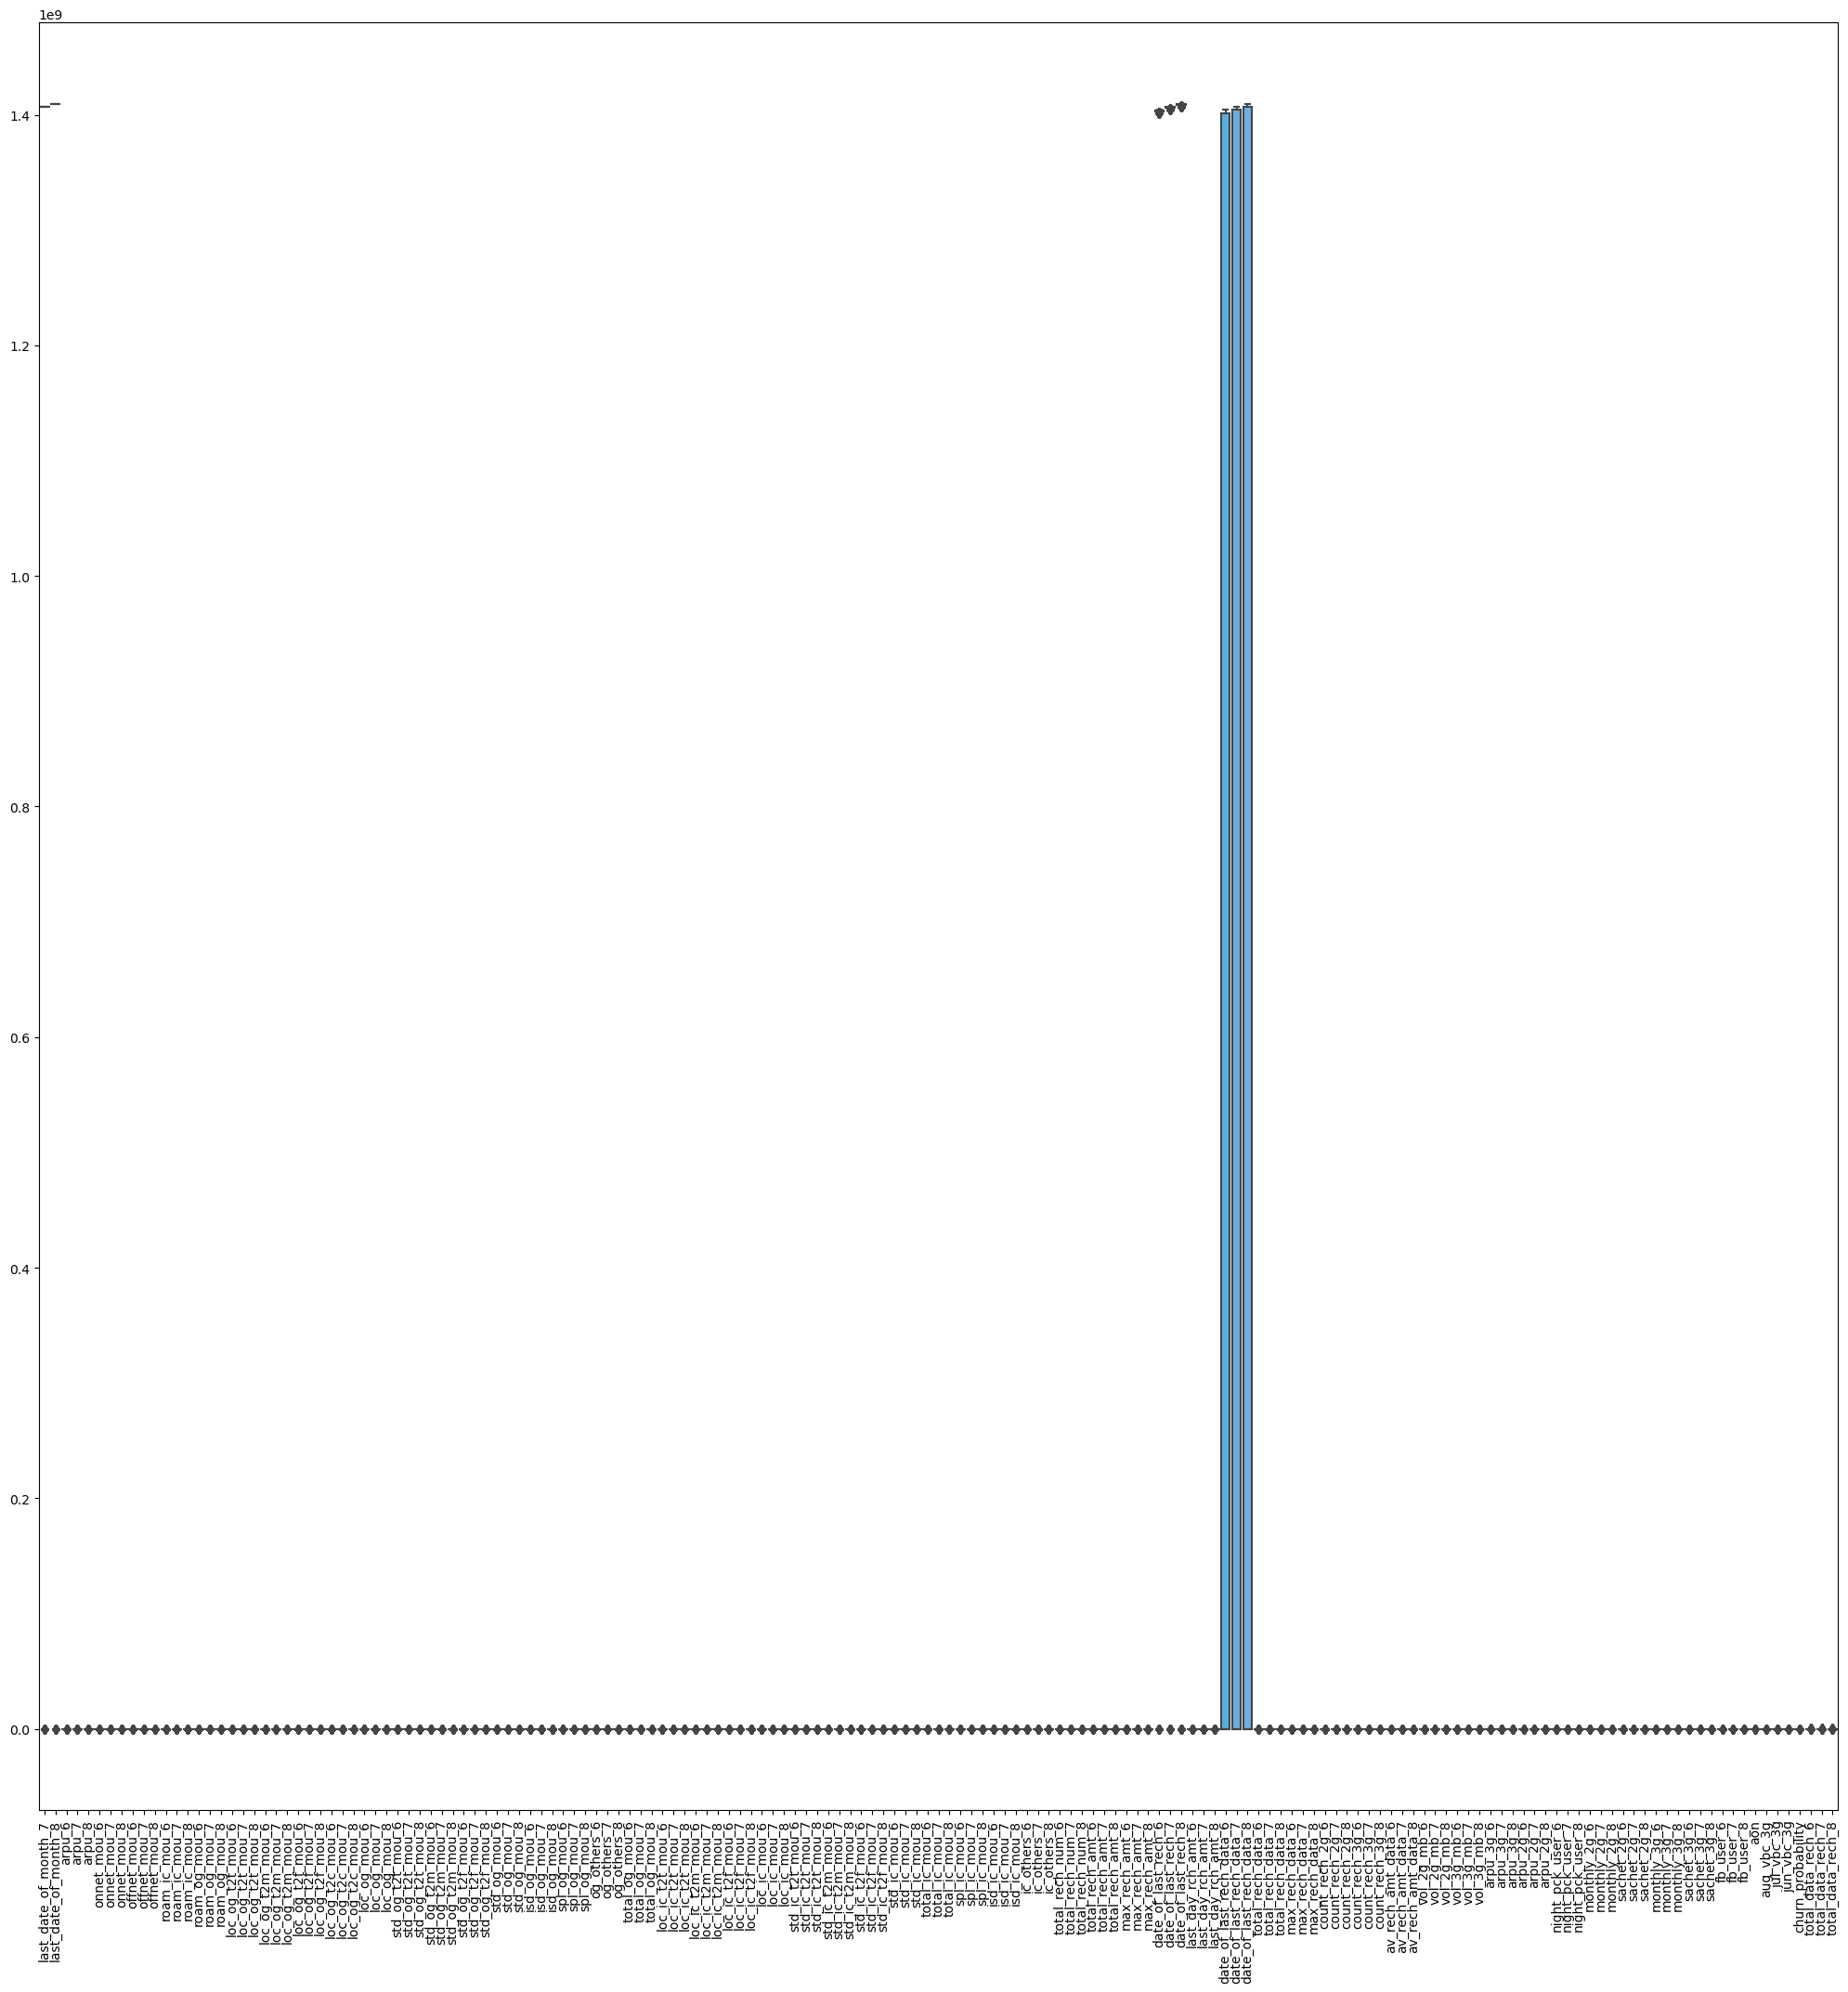

In [489]:
plt.figure(figsize=[25,25])
plt.xticks(rotation=90)
sns.boxplot(data=churn_cust_dataset_num)

In [490]:
churn_cust_dataset.shape

(69999, 168)

In [491]:
## Capping outliers to 5% at lower bound and 95% at upper bound
print(churn_cust_dataset_num.columns)
for col in churn_cust_dataset_num.columns:
    churn_cust_dataset_num[col][churn_cust_dataset_num[col] <= churn_cust_dataset_num[col].quantile(0.05)] = churn_cust_dataset_num[col].quantile(0.05)
    churn_cust_dataset_num[col][churn_cust_dataset_num[col] >= churn_cust_dataset_num[col].quantile(0.95)] = churn_cust_dataset_num[col].quantile(0.95)

Index(['last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'total_data_rech_6',
       'total_data_rech_7', 'total_data_rech_8'],
      dtype='object', length=163)


In [492]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[100,100])
plt.xticks(rotation=90)
sns.boxplot(data=churn_cust_dataset_num);

In [493]:
churn_cust_dataset.shape


(69999, 168)

In [494]:
churn_cust_dataset_num.shape

(69999, 163)

In [495]:
## Concatenate the outlier treated numerical columns with one categorical columns if applicable
#churn_cust_dataset_id =churn_cust_dataset['id']
dataset = churn_cust_dataset_num #pd.concat([churn_cust_dataset_num], axis=1)
## View the first few rows of our dataframe
dataset.head()

,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,total_data_rech_8
0,1406764800,1409443200,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,...,0.0,0.0,1958,0.0,0.0,0.0,0,231.0,130.0,20.0
1,1406764800,1409443200,1.500,122.787,42.953,0.00,0.00,0.00,0.00,25.99,...,1.0,0.0,710,0.0,0.0,0.0,0,0.0,580.0,250.0
2,1406764800,1409443200,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,...,0.0,0.0,882,0.0,0.0,0.0,0,140.0,480.0,0.0
3,1406764800,1409443200,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,...,0.0,0.0,982,0.0,0.0,0.0,0,320.0,960.0,390.0
4,1406764800,1409443200,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,...,1.0,1.0,647,0.0,0.0,0.0,0,3770.0,1360.0,976.0


In [496]:
# Putting feature variable to X
X = dataset.drop('churn_probability',axis=1)

# Putting response variable to y
y = dataset['churn_probability']

In [497]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((48999, 162), (21000, 162))

In [498]:
X_train.shape

(48999, 162)

In [499]:
coltemp = X_train.columns
coltemp

Index(['last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'total_data_rech_6', 'total_data_rech_7',
       'total_data_rech_8'],
      dtype='object', length=162)

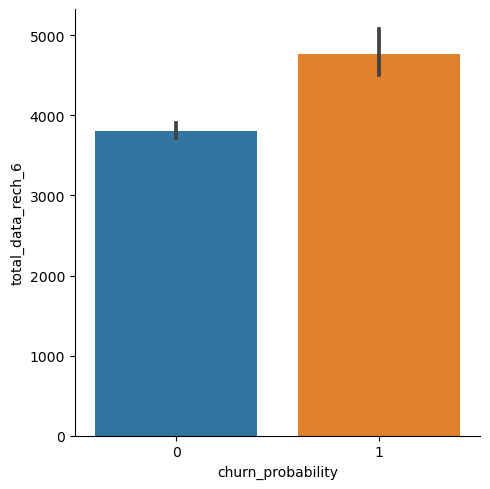

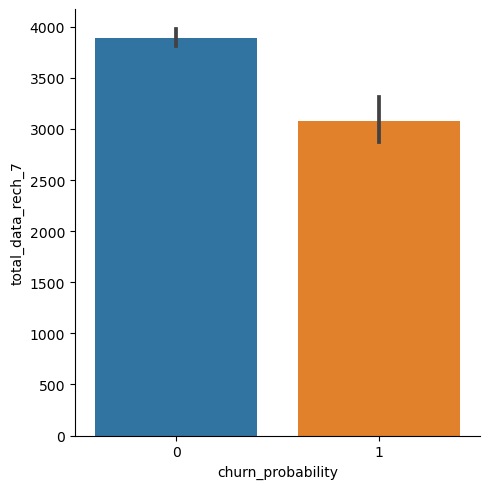

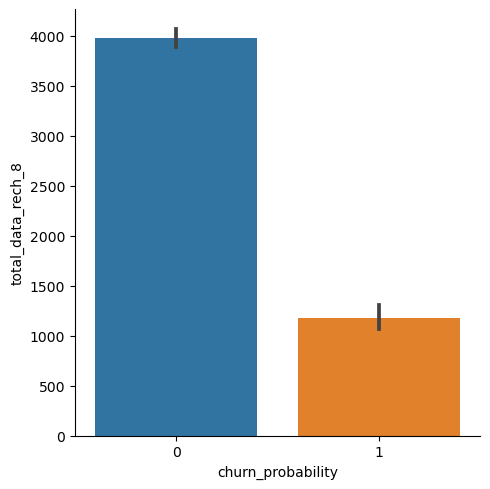

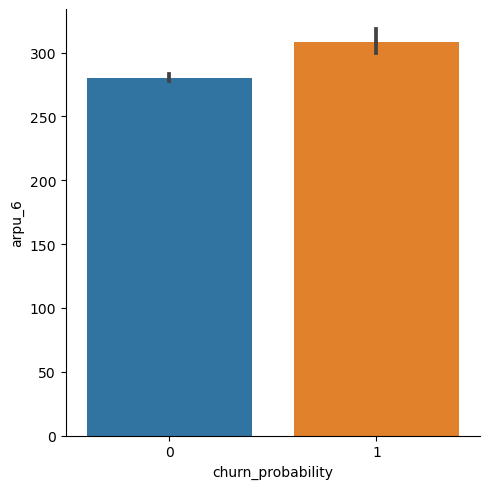

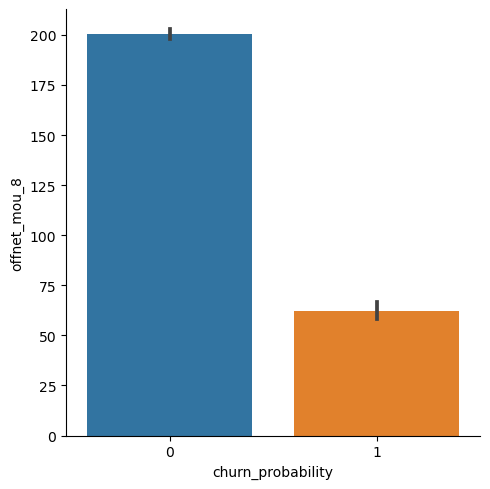

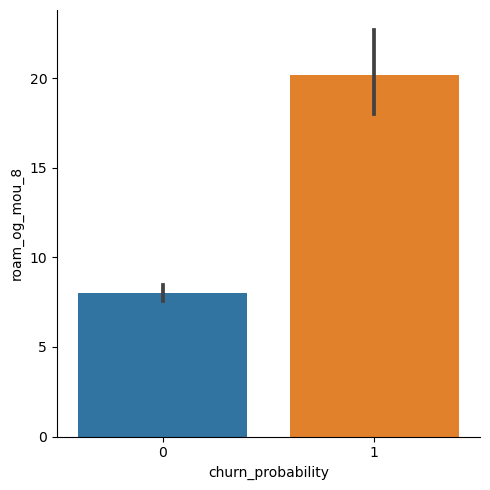

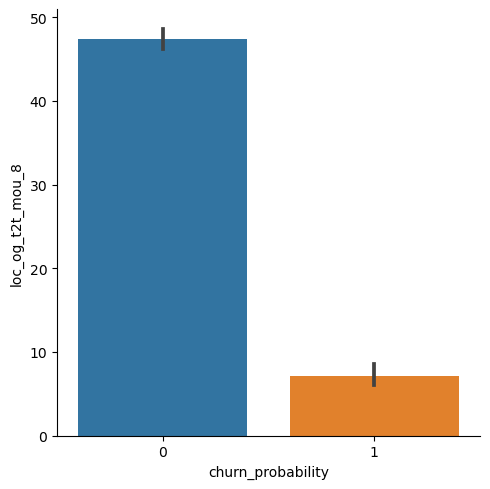

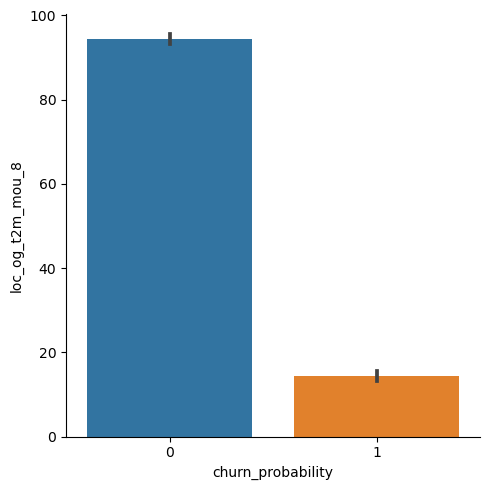

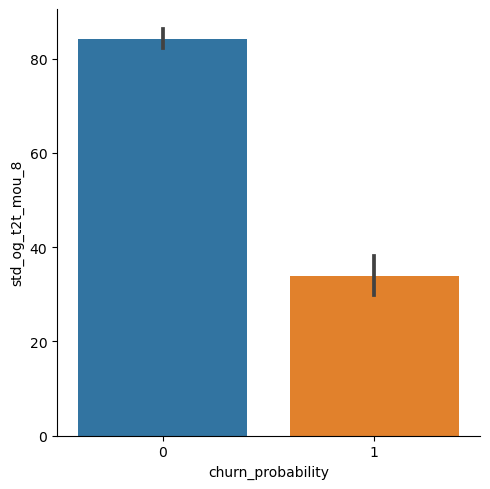

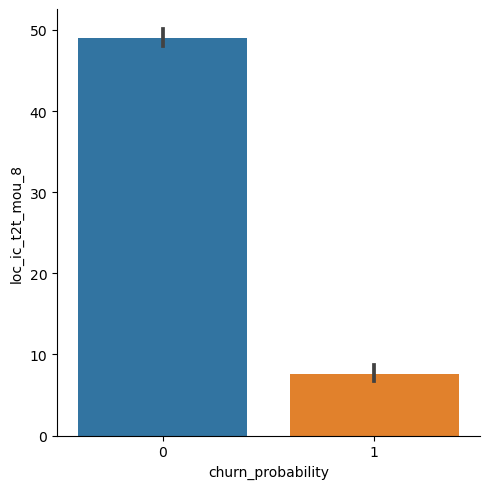

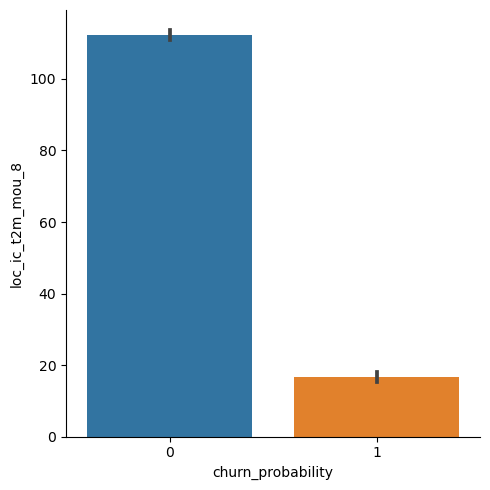

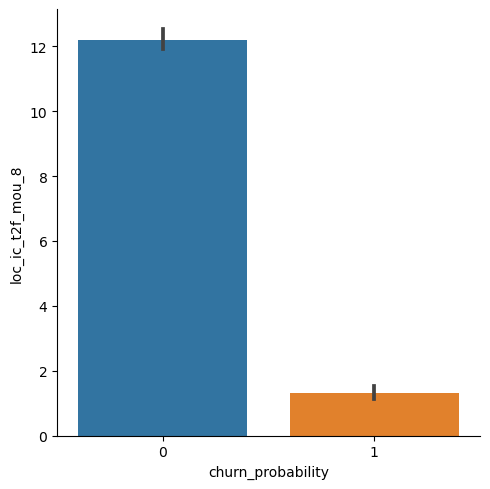

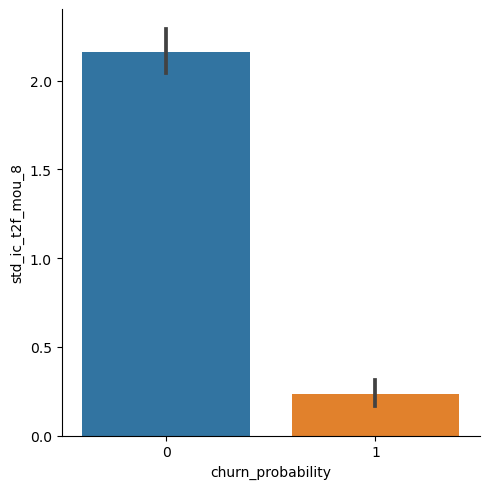

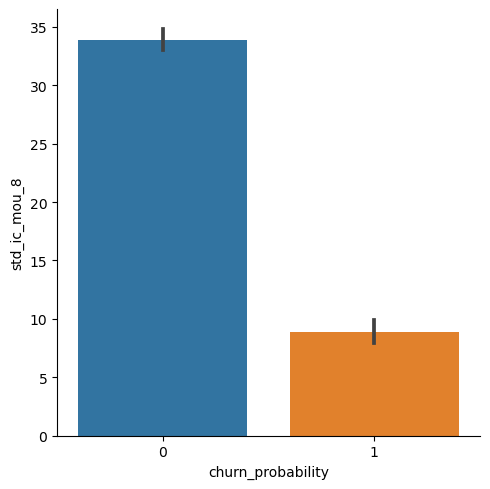

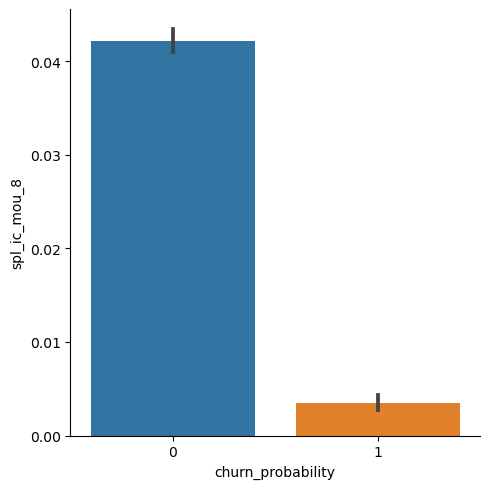

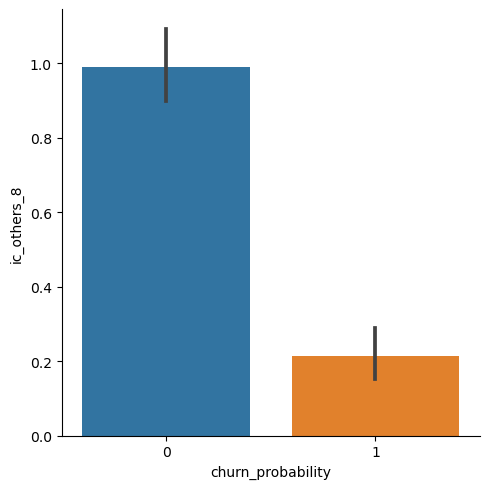

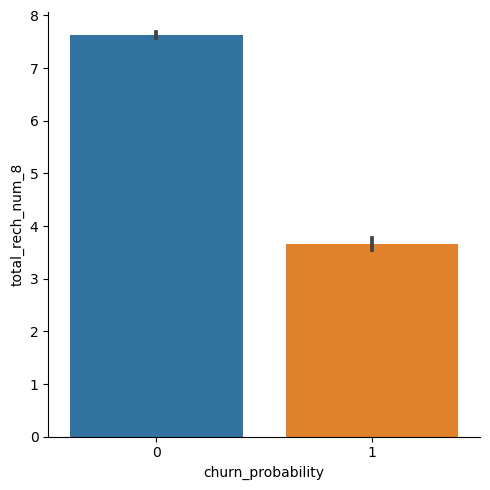

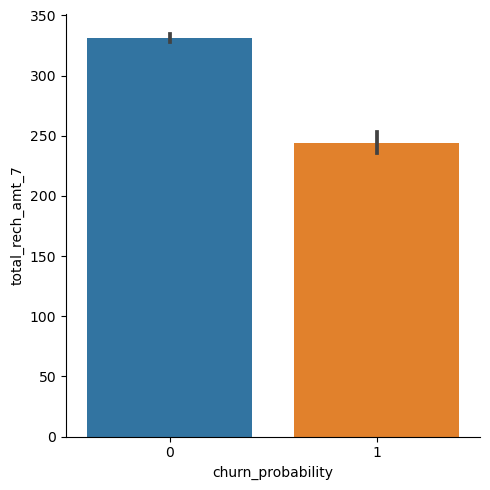

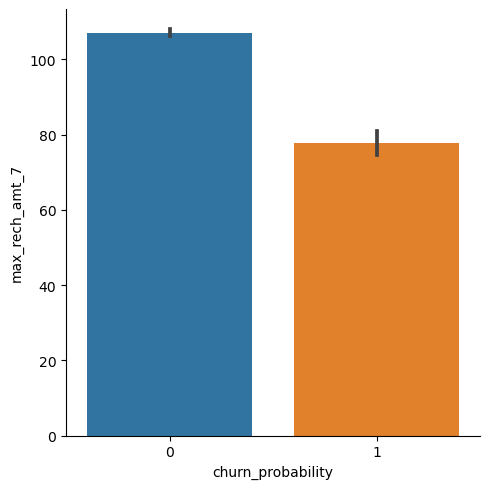

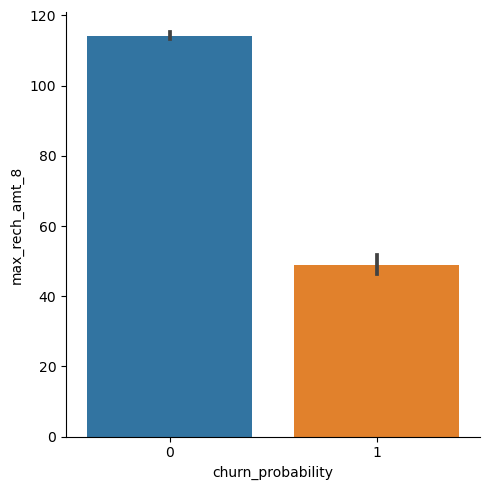

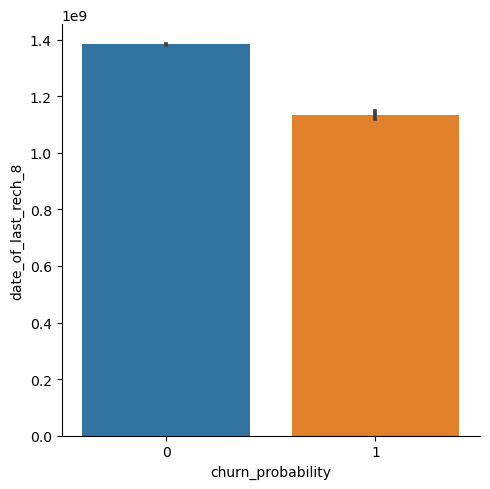

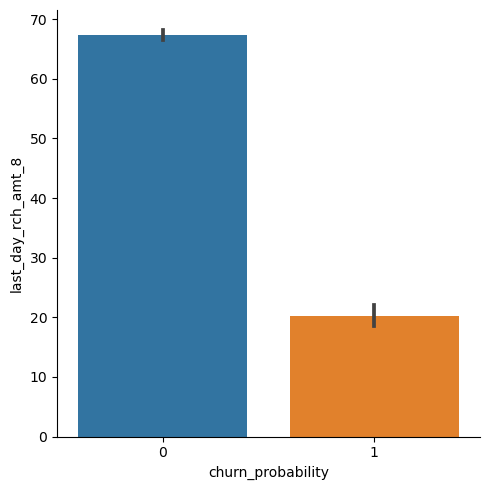

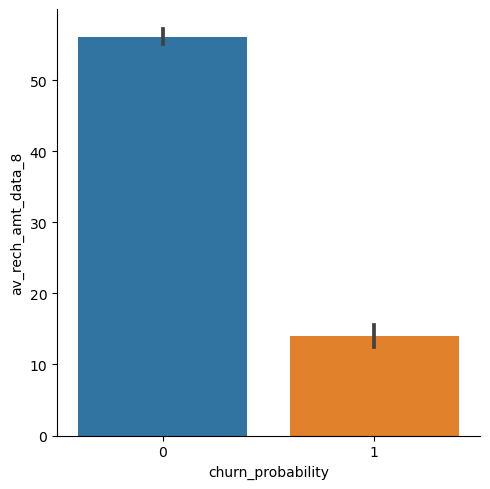

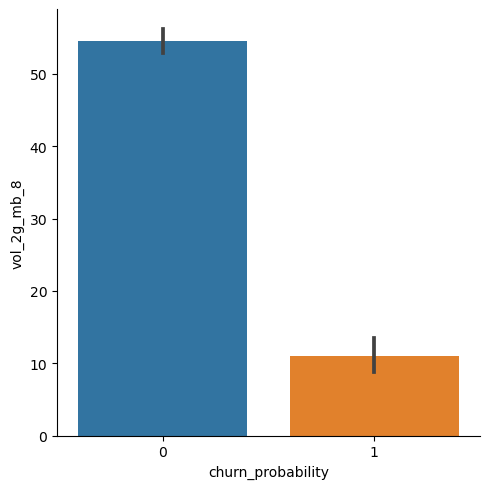

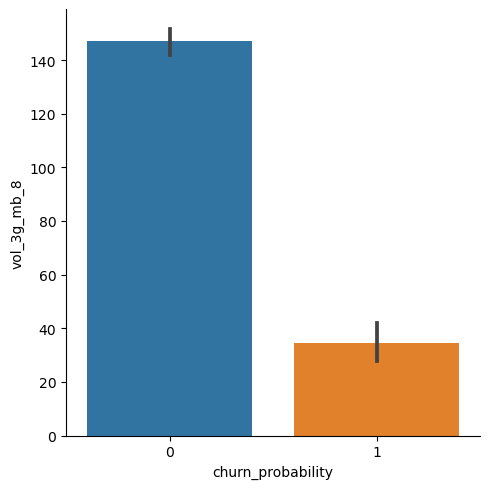

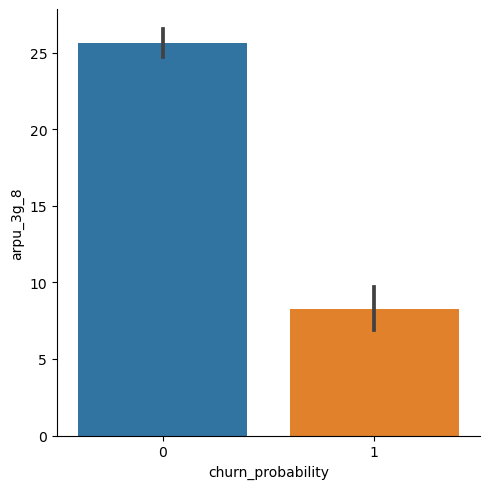

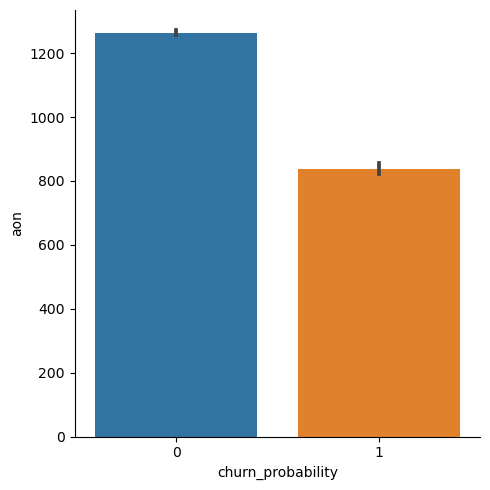

In [500]:
selected_columns = ['total_data_rech_6','total_data_rech_7','total_data_rech_8','arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon','churn_probability']
for i in selected_columns:
  if i != 'churn_probability':
     sns.catplot(data=churn_cust_dataset[selected_columns],x='churn_probability', kind='bar',y = i)

## 3. Feature Engineering and Variable Transformation 

Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date

Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data

In [501]:
scaler = StandardScaler()

X_train[coltemp] = scaler.fit_transform(X_train[coltemp])

X_train.head()

,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_data_rech_8
61787,0.0,0.0,0.484290,0.934468,1.857679,-0.258765,-0.017714,-0.225532,2.536846,2.871208,...,-0.546606,-0.548432,-0.552115,-0.802041,-0.354908,-0.345378,-0.339169,0.141901,0.750531,0.442827
19961,0.0,0.0,-0.804046,-0.756739,-0.888937,-0.637007,-0.623989,-0.621073,-0.849388,-0.829841,...,1.829471,1.823380,1.811218,-0.687199,-0.354908,-0.345378,-0.339169,-0.522642,-0.515273,-0.590053
11040,0.0,0.0,0.454557,0.026941,-0.043543,-0.336707,-0.413835,0.110716,0.194906,0.686668,...,-0.546606,-0.548432,-0.552115,2.081046,-0.354908,-0.345378,-0.339169,0.151755,-0.425560,0.029928
27673,0.0,0.0,0.284828,-0.913120,-0.947430,1.682855,-0.354170,-0.553508,0.042278,-0.731865,...,-0.546606,-0.548432,-0.552115,-0.715636,-0.354908,-0.345378,-0.339169,0.120991,-0.677492,-0.681696
22876,0.0,0.0,-0.900542,-0.854786,-0.798718,-0.582882,-0.432222,-0.403475,-0.598811,-0.655245,...,-0.546606,-0.548432,-0.552115,-0.745167,-0.354908,-0.345378,-0.339169,-0.734623,-0.729107,-0.577902


In [502]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48849
Model Family:                Binomial   Df Model:                          149
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9669.9
Date:                Wed, 03 Jan 2024   Deviance:                       19340.
Time:                        11:26:20   Pearson chi2:                 2.11e+06
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2308
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.0561      0.048    -84.670      0.000      -4.150      -3.962
last_date_of_month_7      8.407e-16   8.48e-16      0.991      0.322   -8.21e-16     2.5e-15
last_date_of_month_8     -1.876e-15   6.71e-16     -2.796      0.005   -3.19e-15   -5.61e-16
arpu_6                       0.1405      0.069      2.029      0.042       0.005       0.276
arpu_7                       0.1112      0.076      1.467      0.142      -0.037       0.260
arpu_8                      -0.0790      0.082     -0.965      0.335      -0.239       0.081
onnet_mou_6                 -0.1487      0.089     -1.675      0.094      -0.323       0.025
onnet_mou_7                  0.1763      0.108      1.628      0.104      -0.036       0.389
onnet_mou_8                 -0.1920      0.117     -1.636      0.102      -0.422       0.038
offnet_mou_6                 0.0686      0.088      0.782      0.434      -0.103       0.240
offnet_mou_7                 0.1588      0.103      1.539      0.124      -0.043       0.361
offnet_mou_8                -0.4448      0.113     -3.919      0.000      -0.667      -0.222
roam_ic_mou_6               -0.0088      0.033     -0.269      0.788      -0.073       0.056
roam_ic_mou_7                0.0446      0.029      1.544      0.123      -0.012       0.101
roam_ic_mou_8                0.0251      0.027      0.927      0.354      -0.028       0.078
roam_og_mou_6                0.0752      0.032      2.370      0.018       0.013       0.137
roam_og_mou_7               -0.0158      0.028     -0.571      0.568      -0.070       0.038
roam_og_mou_8                0.3154      0.026     11.911      0.000       0.264       0.367
loc_og_t2t_mou_6            -0.2193      0.074     -2.946      0.003      -0.365      -0.073
loc_og_t2t_mou_7             0.1078      0.090      1.202      0.229      -0.068       0.284
loc_og_t2t_mou_8            -0.2665      0.114     -2.331      0.020      -0.490      -0.042
loc_og_t2m_mou_6            -0.3929      0.121     -3.237      0.001      -0.631      -0.155
loc_og_t2m_mou_7            -0.0036      0.154     -0.023      0.981      -0.306       0.299
loc_og_t2m_mou_8            -0.1980      0.189     -1.050      0.294      -0.568       0.171
loc_og_t2f_mou_6            -0.0920      0.036     -2.555      0.011      -0.163      -0.021
loc_og_t2f_mou_7             0.0627      0.040      1.570      0.116      -0.016       0.141
loc_og_t2f_mou_8            -0.0924      0.047     -1.970      0.049      -0.184      -0.000
loc_og_t2c_mou_6             0.0129      0.024      0.530      0.596      -0.035       0.061
loc_og_t2c_mou_7             0.0437      0.026      1.656      0.098      -0.008       0.095
loc_og_t2c_mou_8             0.0115      0.032      0.358      0.721      -0.051       0.074
loc_og_mou_6  

### Feature Selection Using RFE

In [503]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [504]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=30)  
#rfe = RFE(logreg, step=20,16)             # running RFE with 16 variables as output
# running RFE with 16 variables as output
rfe = rfe.fit(X_train, y_train)

In [505]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True, False,
        True,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,

In [506]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('last_date_of_month_7', False, 133),
 ('last_date_of_month_8', False, 132),
 ('arpu_6', True, 1),
 ('arpu_7', False, 30),
 ('arpu_8', False, 10),
 ('onnet_mou_6', False, 39),
 ('onnet_mou_7', False, 5),
 ('onnet_mou_8', False, 2),
 ('offnet_mou_6', False, 67),
 ('offnet_mou_7', False, 3),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 112),
 ('roam_ic_mou_7', False, 78),
 ('roam_ic_mou_8', False, 87),
 ('roam_og_mou_6', False, 40),
 ('roam_og_mou_7', False, 107),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 9),
 ('loc_og_t2t_mou_7', False, 46),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 7),
 ('loc_og_t2m_mou_7', False, 41),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 26),
 ('loc_og_t2f_mou_7', False, 63),
 ('loc_og_t2f_mou_8', False, 50),
 ('loc_og_t2c_mou_6', False, 109),
 ('loc_og_t2c_mou_7', False, 57),
 ('loc_og_t2c_mou_8', False, 111),
 ('loc_og_mou_6', False, 8),
 ('loc_og_mou_7', False, 108),
 ('loc_og_mou_8', True, 1),
 (

In [507]:
col = X_train.columns[rfe.support_]

In [508]:
X_train.columns[~rfe.support_]

Index(['last_date_of_month_7', 'last_date_of_month_8', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_data_rech_6',
       'total_data_rech_7'],
      dtype='object', length=132)

## 4. Model Selection, Model Building, and  Prediction 

Assessing the model with StatsModels

In [509]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48968
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9879.1
Date:                Wed, 03 Jan 2024   Deviance:                       19758.
Time:                        11:30:10   Pearson chi2:                 3.27e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2242
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0494      0.047    -85.502      0.000      -4.142      -3.957
arpu_6                  0.2488      0.022     11.101      0.000       0.205       0.293
offnet_mou_8           -0.3309      0.073     -4.559      0.000      -0.473      -0.189
roam_og_mou_8           0.3462      0.017     20.488      0.000       0.313       0.379
loc_og_t2t_mou_8       -0.3429      0.101     -3.401      0.001      -0.540      -0.145
loc_og_t2m_mou_8       -0.3831      0.146     -2.628      0.009      -0.669      -0.097
loc_og_mou_8            0.5723      0.231      2.473      0.013       0.119       1.026
std_og_t2t_mou_8       -0.3098      0.062     -5.008      0.000      -0.431      -0.189
std_og_mou_8            0.6253      0.201      3.108      0.002       0.231       1.020
total_og_mou_8         -0.6262      0.211     -2.968      0.003      -1.040      -0.213
loc_ic_t2t_mou_8       -0.8306      0.089     -9.361      0.000      -1.005      -0.657
loc_ic_t2m_mou_8       -1.4931      0.119    -12.544      0.000      -1.726      -1.260
loc_ic_t2f_mou_8       -0.4219      0.053     -7.953      0.000      -0.526      -0.318
loc_ic_mou_8            0.7542      0.155      4.864      0.000       0.450       1.058
std_ic_t2f_mou_8       -0.2882      0.045     -6.410      0.000      -0.376      -0.200
std_ic_mou_8           -0.2169      0.032     -6.817      0.000      -0.279      -0.155
spl_ic_mou_8           -0.6229      0.045    -13.825      0.000      -0.711      -0.535
ic_others_8            -0.2555      0.037     -6.872      0.000      -0.328      -0.183
total_rech_num_8       -0.5774      0.053    -10.932      0.000      -0.681      -0.474
total_rech_amt_7        0.3550      0.035     10.271      0.000       0.287       0.423
total_rech_amt_8        0.1786      0.089      2.016      0.044       0.005       0.352
max_rech_amt_7         -0.2806      0.029     -9.720      0.000      -0.337      -0.224
max_rech_amt_8         -0.2143      0.044     -4.874      0.000      -0.301      -0.128
date_of_last_rech_8    -0.3846      0.018    -20.891      0.000      -0.421      -0.349
last_day_rch_amt_8     -0.5441      0.035    -15.422      0.000      -0.613      -0.475
av_rech_amt_data_8     -0.2766      0.069     -4.001      0.000      -0.412      -0.141
vol_2g_mb_8            -0.2312      0.041     -5.594      0.000      -0.312      -0.150
vol_3g_mb_8            -0.2615      0.056     -4.640      0.000      -0.372      -0.151
arpu_3g_8               0.2446      0.049      5.029      0.000       0.149       0.340
aon                    -0.3572      0.024    -14.924      0.000      -0.404      -0.310
total_data_rech_8       0.3917      0.084      4.669      0.000       0.227       0.556
=======================================================================================
"""

In [510]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:20]

61787    0.015631
19961    0.003239
11040    0.000145
27673    0.340600
22876    0.003139
3290     0.006233
32428    0.440385
13862    0.845633
1914     0.075075
51598    0.044775
5308     0.063405
63481    0.811913
49278    0.644251
63938    0.009408
13920    0.052454
35226    0.000025
36298    0.068817
2572     0.029649
12737    0.404641
29578    0.014453
dtype: float64

In [511]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:20]

array([1.56305710e-02, 3.23901768e-03, 1.45044907e-04, 3.40600036e-01,
       3.13872311e-03, 6.23326996e-03, 4.40384596e-01, 8.45633212e-01,
       7.50751857e-02, 4.47747109e-02, 6.34051874e-02, 8.11913066e-01,
       6.44251433e-01, 9.40794025e-03, 5.24536860e-02, 2.46548548e-05,
       6.88173179e-02, 2.96487076e-02, 4.04641269e-01, 1.44526235e-02])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [512]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.015631,61787
1,0,0.003239,19961
2,0,0.000145,11040
3,0,0.340600,27673
4,0,0.003139,22876


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [513]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(50)

,Churn,Churn_Prob,CustID,predicted
0,0,0.015631,61787,0
1,0,0.003239,19961,0
2,0,0.000145,11040,0
3,0,0.340600,27673,0
4,0,0.003139,22876,0
5,0,0.006233,3290,0
6,0,0.440385,32428,0
7,1,0.845633,13862,1
8,0,0.075075,1914,0
9,0,0.044775,51598,0


In [514]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[43102   920]
 [ 2983  1994]]


In [515]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9203453131696565


#### Checking VIFs

In [516]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_og_mou_8,33.66
8,total_og_mou_8,22.20
12,loc_ic_mou_8,20.85
7,std_og_mou_8,18.34
4,loc_og_t2m_mou_8,17.07
10,loc_ic_t2m_mou_8,12.45
19,total_rech_amt_8,12.36
29,total_data_rech_8,11.13
1,offnet_mou_8,9.25
3,loc_og_t2t_mou_8,6.45


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'loc_og_mou_8' has the highest VIF. So let's start by dropping that.

In [517]:
col = col.drop('loc_og_mou_8', 1)
col

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon', 'total_data_rech_8'],
      dtype='object')

In [518]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48969
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9881.9
Date:                Wed, 03 Jan 2024   Deviance:                       19764.
Time:                        11:30:30   Pearson chi2:                 3.05e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2241
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0449      0.047    -85.420      0.000      -4.138      -3.952
arpu_6                  0.2495      0.022     11.132      0.000       0.206       0.293
offnet_mou_8           -0.3104      0.072     -4.332      0.000      -0.451      -0.170
roam_og_mou_8           0.3465      0.017     20.509      0.000       0.313       0.380
loc_og_t2t_mou_8       -0.1526      0.064     -2.397      0.017      -0.277      -0.028
loc_og_t2m_mou_8       -0.0767      0.084     -0.909      0.364      -0.242       0.089
std_og_t2t_mou_8       -0.2944      0.061     -4.798      0.000      -0.415      -0.174
std_og_mou_8            0.3746      0.175      2.140      0.032       0.032       0.718
total_og_mou_8         -0.3504      0.180     -1.946      0.052      -0.703       0.003
loc_ic_t2t_mou_8       -0.8568      0.088     -9.714      0.000      -1.030      -0.684
loc_ic_t2m_mou_8       -1.5258      0.118    -12.903      0.000      -1.758      -1.294
loc_ic_t2f_mou_8       -0.4213      0.053     -7.936      0.000      -0.525      -0.317
loc_ic_mou_8            0.7936      0.154      5.147      0.000       0.491       1.096
std_ic_t2f_mou_8       -0.2876      0.045     -6.398      0.000      -0.376      -0.200
std_ic_mou_8           -0.2146      0.032     -6.752      0.000      -0.277      -0.152
spl_ic_mou_8           -0.6234      0.045    -13.836      0.000      -0.712      -0.535
ic_others_8            -0.2561      0.037     -6.890      0.000      -0.329      -0.183
total_rech_num_8       -0.5745      0.053    -10.865      0.000      -0.678      -0.471
total_rech_amt_7        0.3542      0.035     10.240      0.000       0.286       0.422
total_rech_amt_8        0.1676      0.089      1.889      0.059      -0.006       0.341
max_rech_amt_7         -0.2799      0.029     -9.697      0.000      -0.337      -0.223
max_rech_amt_8         -0.2110      0.044     -4.797      0.000      -0.297      -0.125
date_of_last_rech_8    -0.3850      0.018    -20.912      0.000      -0.421      -0.349
last_day_rch_amt_8     -0.5455      0.035    -15.453      0.000      -0.615      -0.476
av_rech_amt_data_8     -0.2727      0.069     -3.946      0.000      -0.408      -0.137
vol_2g_mb_8            -0.2326      0.041     -5.626      0.000      -0.314      -0.152
vol_3g_mb_8            -0.2624      0.056     -4.660      0.000      -0.373      -0.152
arpu_3g_8               0.2446      0.049      5.027      0.000       0.149       0.340
aon                    -0.3574      0.024    -14.935      0.000      -0.404      -0.311
total_data_rech_8       0.3865      0.084      4.593      0.000       0.222       0.551
=======================================================================================
"""

In [519]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,loc_ic_mou_8,20.42
7,total_og_mou_8,16.94
6,std_og_mou_8,15.48
18,total_rech_amt_8,12.36
9,loc_ic_t2m_mou_8,12.20
28,total_data_rech_8,11.11
1,offnet_mou_8,9.21
5,std_og_t2t_mou_8,5.97
4,loc_og_t2m_mou_8,5.61
16,total_rech_num_8,5.57


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'loc_ic_mou_8' has the highest VIF. So let's start by dropping that.


In [520]:
col = col.drop('loc_ic_mou_8', 1)
col

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon', 'total_data_rech_8'],
      dtype='object')

In [521]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48970
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9892.2
Date:                Wed, 03 Jan 2024   Deviance:                       19784.
Time:                        11:30:35   Pearson chi2:                 2.69e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2238
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0464      0.048    -85.024      0.000      -4.140      -3.953
arpu_6                  0.2501      0.022     11.160      0.000       0.206       0.294
offnet_mou_8           -0.3054      0.072     -4.262      0.000      -0.446      -0.165
roam_og_mou_8           0.3470      0.017     20.554      0.000       0.314       0.380
loc_og_t2t_mou_8       -0.1743      0.064     -2.720      0.007      -0.300      -0.049
loc_og_t2m_mou_8       -0.0938      0.085     -1.102      0.270      -0.260       0.073
std_og_t2t_mou_8       -0.2924      0.061     -4.766      0.000      -0.413      -0.172
std_og_mou_8            0.3387      0.176      1.920      0.055      -0.007       0.685
total_og_mou_8         -0.3143      0.182     -1.729      0.084      -0.671       0.042
loc_ic_t2t_mou_8       -0.5308      0.056     -9.561      0.000      -0.640      -0.422
loc_ic_t2m_mou_8       -1.0136      0.067    -15.202      0.000      -1.144      -0.883
loc_ic_t2f_mou_8       -0.3143      0.049     -6.426      0.000      -0.410      -0.218
std_ic_t2f_mou_8       -0.2917      0.045     -6.480      0.000      -0.380      -0.203
std_ic_mou_8           -0.2181      0.032     -6.851      0.000      -0.280      -0.156
spl_ic_mou_8           -0.6247      0.045    -13.863      0.000      -0.713      -0.536
ic_others_8            -0.2586      0.037     -6.953      0.000      -0.331      -0.186
total_rech_num_8       -0.5741      0.053    -10.859      0.000      -0.678      -0.470
total_rech_amt_7        0.3542      0.035     10.240      0.000       0.286       0.422
total_rech_amt_8        0.1653      0.089      1.863      0.062      -0.009       0.339
max_rech_amt_7         -0.2801      0.029     -9.706      0.000      -0.337      -0.224
max_rech_amt_8         -0.2133      0.044     -4.853      0.000      -0.299      -0.127
date_of_last_rech_8    -0.3849      0.018    -20.925      0.000      -0.421      -0.349
last_day_rch_amt_8     -0.5458      0.035    -15.463      0.000      -0.615      -0.477
av_rech_amt_data_8     -0.2710      0.069     -3.924      0.000      -0.406      -0.136
vol_2g_mb_8            -0.2329      0.041     -5.636      0.000      -0.314      -0.152
vol_3g_mb_8            -0.2617      0.056     -4.650      0.000      -0.372      -0.151
arpu_3g_8               0.2447      0.049      5.033      0.000       0.149       0.340
aon                    -0.3611      0.024    -15.102      0.000      -0.408      -0.314
total_data_rech_8       0.3858      0.084      4.585      0.000       0.221       0.551
=======================================================================================
"""

In [522]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_og_mou_8,16.80
6,std_og_mou_8,15.42
17,total_rech_amt_8,12.36
27,total_data_rech_8,11.11
1,offnet_mou_8,9.21
5,std_og_t2t_mou_8,5.97
4,loc_og_t2m_mou_8,5.58
15,total_rech_num_8,5.57
22,av_rech_amt_data_8,5.26
16,total_rech_amt_7,3.85


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'total_og_mou_8' has the highest VIF. So let's start by dropping that.

In [523]:
col = col.drop('total_og_mou_8', 1)
col

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'vol_3g_mb_8', 'arpu_3g_8', 'aon', 'total_data_rech_8'],
      dtype='object')

In [524]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48971
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9893.9
Date:                Wed, 03 Jan 2024   Deviance:                       19788.
Time:                        11:30:41   Pearson chi2:                 2.85e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2237
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0384      0.047    -85.573      0.000      -4.131      -3.946
arpu_6                  0.2505      0.022     11.183      0.000       0.207       0.294
offnet_mou_8           -0.2908      0.070     -4.133      0.000      -0.429      -0.153
roam_og_mou_8           0.3500      0.017     20.854      0.000       0.317       0.383
loc_og_t2t_mou_8       -0.2354      0.054     -4.343      0.000      -0.342      -0.129
loc_og_t2m_mou_8       -0.1829      0.067     -2.724      0.006      -0.315      -0.051
std_og_t2t_mou_8       -0.2795      0.060     -4.619      0.000      -0.398      -0.161
std_og_mou_8            0.0703      0.082      0.855      0.393      -0.091       0.231
loc_ic_t2t_mou_8       -0.5262      0.055     -9.521      0.000      -0.635      -0.418
loc_ic_t2m_mou_8       -1.0135      0.067    -15.217      0.000      -1.144      -0.883
loc_ic_t2f_mou_8       -0.3177      0.049     -6.497      0.000      -0.413      -0.222
std_ic_t2f_mou_8       -0.2927      0.045     -6.502      0.000      -0.381      -0.204
std_ic_mou_8           -0.2158      0.032     -6.788      0.000      -0.278      -0.153
spl_ic_mou_8           -0.6247      0.045    -13.864      0.000      -0.713      -0.536
ic_others_8            -0.2587      0.037     -6.956      0.000      -0.332      -0.186
total_rech_num_8       -0.5651      0.053    -10.738      0.000      -0.668      -0.462
total_rech_amt_7        0.3511      0.035     10.166      0.000       0.283       0.419
total_rech_amt_8        0.1455      0.088      1.649      0.099      -0.027       0.319
max_rech_amt_7         -0.2791      0.029     -9.677      0.000      -0.336      -0.223
max_rech_amt_8         -0.2075      0.044     -4.735      0.000      -0.293      -0.122
date_of_last_rech_8    -0.3853      0.018    -20.948      0.000      -0.421      -0.349
last_day_rch_amt_8     -0.5456      0.035    -15.461      0.000      -0.615      -0.476
av_rech_amt_data_8     -0.2700      0.069     -3.913      0.000      -0.405      -0.135
vol_2g_mb_8            -0.2326      0.041     -5.632      0.000      -0.314      -0.152
vol_3g_mb_8            -0.2602      0.056     -4.626      0.000      -0.370      -0.150
arpu_3g_8               0.2466      0.049      5.078      0.000       0.151       0.342
aon                    -0.3610      0.024    -15.096      0.000      -0.408      -0.314
total_data_rech_8       0.3723      0.084      4.429      0.000       0.208       0.537
=======================================================================================
"""

In [525]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_rech_amt_8,12.25
6,std_og_mou_8,11.36
26,total_data_rech_8,11.03
1,offnet_mou_8,8.28
5,std_og_t2t_mou_8,5.66
14,total_rech_num_8,5.54
21,av_rech_amt_data_8,5.25
4,loc_og_t2m_mou_8,5.20
15,total_rech_amt_7,3.85
18,max_rech_amt_8,3.82


In [526]:
col = col.drop('total_rech_amt_8', 1)
col

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_7', 'max_rech_amt_7',
       'max_rech_amt_8', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon',
       'total_data_rech_8'],
      dtype='object')

In [527]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48972
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9895.2
Date:                Wed, 03 Jan 2024   Deviance:                       19790.
Time:                        11:30:54   Pearson chi2:                 2.56e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2237
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0376      0.047    -85.572      0.000      -4.130      -3.945
arpu_6                  0.2525      0.022     11.288      0.000       0.209       0.296
offnet_mou_8           -0.2815      0.070     -4.004      0.000      -0.419      -0.144
roam_og_mou_8           0.3540      0.017     21.296      0.000       0.321       0.387
loc_og_t2t_mou_8       -0.2303      0.054     -4.256      0.000      -0.336      -0.124
loc_og_t2m_mou_8       -0.1780      0.067     -2.652      0.008      -0.309      -0.046
std_og_t2t_mou_8       -0.2739      0.060     -4.529      0.000      -0.392      -0.155
std_og_mou_8            0.0750      0.082      0.910      0.363      -0.087       0.237
loc_ic_t2t_mou_8       -0.5253      0.055     -9.506      0.000      -0.634      -0.417
loc_ic_t2m_mou_8       -1.0117      0.067    -15.198      0.000      -1.142      -0.881
loc_ic_t2f_mou_8       -0.3175      0.049     -6.495      0.000      -0.413      -0.222
std_ic_t2f_mou_8       -0.2925      0.045     -6.497      0.000      -0.381      -0.204
std_ic_mou_8           -0.2145      0.032     -6.752      0.000      -0.277      -0.152
spl_ic_mou_8           -0.6249      0.045    -13.869      0.000      -0.713      -0.537
ic_others_8            -0.2589      0.037     -6.961      0.000      -0.332      -0.186
total_rech_num_8       -0.5751      0.052    -10.997      0.000      -0.678      -0.473
total_rech_amt_7        0.3569      0.034     10.377      0.000       0.289       0.424
max_rech_amt_7         -0.2829      0.029     -9.840      0.000      -0.339      -0.227
max_rech_amt_8         -0.1614      0.034     -4.801      0.000      -0.227      -0.096
date_of_last_rech_8    -0.3814      0.018    -20.926      0.000      -0.417      -0.346
last_day_rch_amt_8     -0.5340      0.035    -15.466      0.000      -0.602      -0.466
av_rech_amt_data_8     -0.2698      0.069     -3.915      0.000      -0.405      -0.135
vol_2g_mb_8            -0.2313      0.041     -5.607      0.000      -0.312      -0.150
vol_3g_mb_8            -0.2575      0.056     -4.595      0.000      -0.367      -0.148
arpu_3g_8               0.2487      0.048      5.135      0.000       0.154       0.344
aon                    -0.3606      0.024    -15.085      0.000      -0.407      -0.314
total_data_rech_8       0.4708      0.059      8.044      0.000       0.356       0.586
=======================================================================================
"""

In [528]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_8,11.32
1,offnet_mou_8,8.23
25,total_data_rech_8,6.53
5,std_og_t2t_mou_8,5.64
14,total_rech_num_8,5.38
20,av_rech_amt_data_8,5.25
4,loc_og_t2m_mou_8,5.14
15,total_rech_amt_7,3.77
22,vol_3g_mb_8,3.20
17,max_rech_amt_8,2.80


In [529]:
col = col.drop('std_og_mou_8', 1)
col


Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon', 'total_data_rech_8'],
      dtype='object')

In [530]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48973
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9895.6
Date:                Wed, 03 Jan 2024   Deviance:                       19791.
Time:                        11:31:01   Pearson chi2:                 2.59e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2236
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0353      0.047    -85.700      0.000      -4.128      -3.943
arpu_6                  0.2524      0.022     11.282      0.000       0.209       0.296
offnet_mou_8           -0.2290      0.040     -5.747      0.000      -0.307      -0.151
roam_og_mou_8           0.3489      0.016     22.308      0.000       0.318       0.380
loc_og_t2t_mou_8       -0.2303      0.054     -4.257      0.000      -0.336      -0.124
loc_og_t2m_mou_8       -0.2051      0.060     -3.415      0.001      -0.323      -0.087
std_og_t2t_mou_8       -0.2265      0.030     -7.434      0.000      -0.286      -0.167
loc_ic_t2t_mou_8       -0.5249      0.055     -9.504      0.000      -0.633      -0.417
loc_ic_t2m_mou_8       -1.0107      0.067    -15.195      0.000      -1.141      -0.880
loc_ic_t2f_mou_8       -0.3185      0.049     -6.516      0.000      -0.414      -0.223
std_ic_t2f_mou_8       -0.2928      0.045     -6.503      0.000      -0.381      -0.205
std_ic_mou_8           -0.2142      0.032     -6.743      0.000      -0.276      -0.152
spl_ic_mou_8           -0.6253      0.045    -13.880      0.000      -0.714      -0.537
ic_others_8            -0.2585      0.037     -6.953      0.000      -0.331      -0.186
total_rech_num_8       -0.5769      0.052    -11.052      0.000      -0.679      -0.475
total_rech_amt_7        0.3579      0.034     10.411      0.000       0.291       0.425
max_rech_amt_7         -0.2839      0.029     -9.883      0.000      -0.340      -0.228
max_rech_amt_8         -0.1622      0.034     -4.828      0.000      -0.228      -0.096
date_of_last_rech_8    -0.3811      0.018    -20.915      0.000      -0.417      -0.345
last_day_rch_amt_8     -0.5343      0.035    -15.470      0.000      -0.602      -0.467
av_rech_amt_data_8     -0.2699      0.069     -3.917      0.000      -0.405      -0.135
vol_2g_mb_8            -0.2324      0.041     -5.635      0.000      -0.313      -0.152
vol_3g_mb_8            -0.2576      0.056     -4.595      0.000      -0.367      -0.148
arpu_3g_8               0.2481      0.048      5.122      0.000       0.153       0.343
aon                    -0.3608      0.024    -15.093      0.000      -0.408      -0.314
total_data_rech_8       0.4761      0.058      8.179      0.000       0.362       0.590
=======================================================================================
"""

In [531]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,total_data_rech_8,6.49
13,total_rech_num_8,5.37
19,av_rech_amt_data_8,5.25
14,total_rech_amt_7,3.77
4,loc_og_t2m_mou_8,3.21
21,vol_3g_mb_8,3.20
1,offnet_mou_8,2.90
16,max_rech_amt_8,2.80
15,max_rech_amt_7,2.53
22,arpu_3g_8,2.51


In [532]:
col = col.drop('total_data_rech_8', 1)
col

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon'],
      dtype='object')

In [533]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48974
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9927.6
Date:                Wed, 03 Jan 2024   Deviance:                       19855.
Time:                        11:31:06   Pearson chi2:                 4.67e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2226
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0556      0.047    -85.510      0.000      -4.149      -3.963
arpu_6                  0.2768      0.022     12.457      0.000       0.233       0.320
offnet_mou_8           -0.1297      0.038     -3.416      0.001      -0.204      -0.055
roam_og_mou_8           0.3492      0.016     22.172      0.000       0.318       0.380
loc_og_t2t_mou_8       -0.2189      0.054     -4.032      0.000      -0.325      -0.112
loc_og_t2m_mou_8       -0.2271      0.061     -3.751      0.000      -0.346      -0.108
std_og_t2t_mou_8       -0.1717      0.030     -5.767      0.000      -0.230      -0.113
loc_ic_t2t_mou_8       -0.5246      0.055     -9.498      0.000      -0.633      -0.416
loc_ic_t2m_mou_8       -1.0236      0.067    -15.341      0.000      -1.154      -0.893
loc_ic_t2f_mou_8       -0.3199      0.049     -6.541      0.000      -0.416      -0.224
std_ic_t2f_mou_8       -0.2867      0.045     -6.370      0.000      -0.375      -0.198
std_ic_mou_8           -0.2236      0.032     -7.024      0.000      -0.286      -0.161
spl_ic_mou_8           -0.6323      0.045    -14.058      0.000      -0.720      -0.544
ic_others_8            -0.2616      0.037     -7.028      0.000      -0.335      -0.189
total_rech_num_8       -0.2919      0.037     -7.844      0.000      -0.365      -0.219
total_rech_amt_7        0.3851      0.034     11.201      0.000       0.318       0.452
max_rech_amt_7         -0.2943      0.029    -10.208      0.000      -0.351      -0.238
max_rech_amt_8         -0.1457      0.034     -4.307      0.000      -0.212      -0.079
date_of_last_rech_8    -0.4173      0.018    -23.660      0.000      -0.452      -0.383
last_day_rch_amt_8     -0.5125      0.034    -14.859      0.000      -0.580      -0.445
av_rech_amt_data_8     -0.2732      0.069     -3.961      0.000      -0.408      -0.138
vol_2g_mb_8            -0.2328      0.041     -5.653      0.000      -0.314      -0.152
vol_3g_mb_8            -0.2500      0.056     -4.468      0.000      -0.360      -0.140
arpu_3g_8               0.2801      0.048      5.794      0.000       0.185       0.375
aon                    -0.3560      0.024    -14.901      0.000      -0.403      -0.309
=======================================================================================
"""

In [534]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,av_rech_amt_data_8,5.25
14,total_rech_amt_7,3.68
4,loc_og_t2m_mou_8,3.21
21,vol_3g_mb_8,3.20
16,max_rech_amt_8,2.77
1,offnet_mou_8,2.65
15,max_rech_amt_7,2.51
22,arpu_3g_8,2.48
13,total_rech_num_8,2.41
7,loc_ic_t2m_mou_8,2.25


In [535]:
col

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon'],
      dtype='object')

<Axes: >

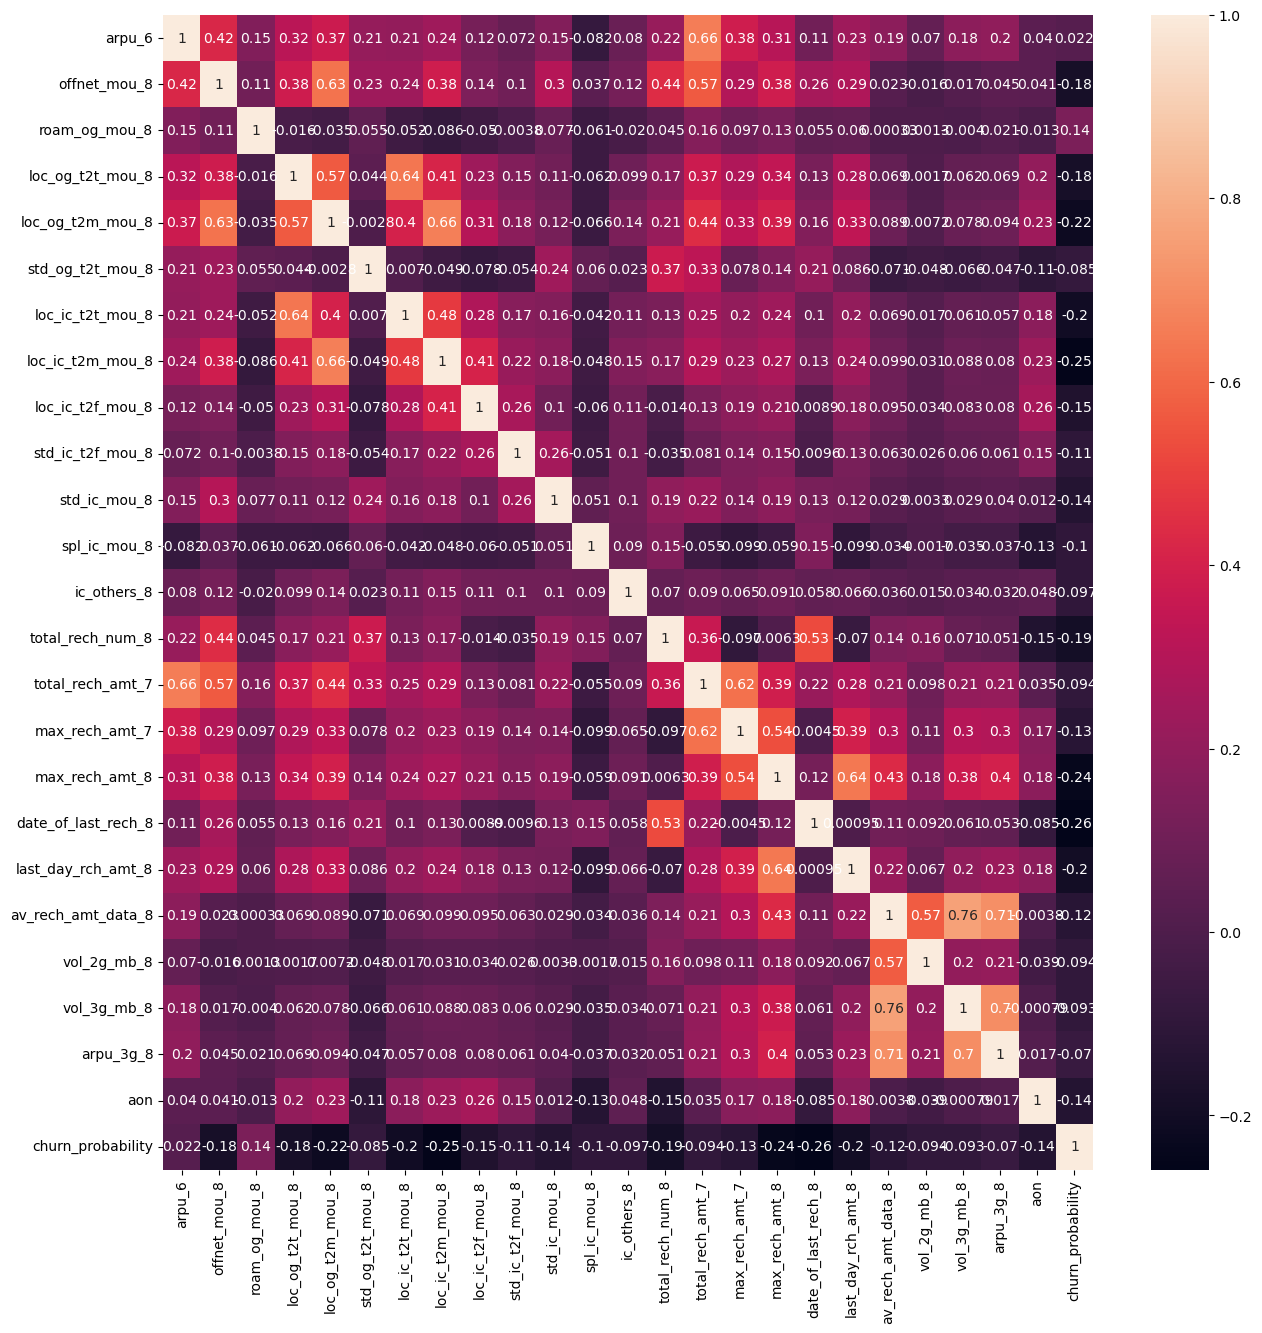

In [536]:
# check coorelation 
plt.figure(figsize=(15,15))
col_chrun=['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon',  'churn_probability']
sns.heatmap(pd.DataFrame(churn_cust_dataset_num, columns=col_chrun).corr(),annot = True)

In [537]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48974
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9927.6
Date:                Wed, 03 Jan 2024   Deviance:                       19855.
Time:                        11:31:13   Pearson chi2:                 4.67e+06
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2226
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.0556      0.047    -85.510      0.000      -4.149      -3.963
arpu_6                  0.2768      0.022     12.457      0.000       0.233       0.320
offnet_mou_8           -0.1297      0.038     -3.416      0.001      -0.204      -0.055
roam_og_mou_8           0.3492      0.016     22.172      0.000       0.318       0.380
loc_og_t2t_mou_8       -0.2189      0.054     -4.032      0.000      -0.325      -0.112
loc_og_t2m_mou_8       -0.2271      0.061     -3.751      0.000      -0.346      -0.108
std_og_t2t_mou_8       -0.1717      0.030     -5.767      0.000      -0.230      -0.113
loc_ic_t2t_mou_8       -0.5246      0.055     -9.498      0.000      -0.633      -0.416
loc_ic_t2m_mou_8       -1.0236      0.067    -15.341      0.000      -1.154      -0.893
loc_ic_t2f_mou_8       -0.3199      0.049     -6.541      0.000      -0.416      -0.224
std_ic_t2f_mou_8       -0.2867      0.045     -6.370      0.000      -0.375      -0.198
std_ic_mou_8           -0.2236      0.032     -7.024      0.000      -0.286      -0.161
spl_ic_mou_8           -0.6323      0.045    -14.058      0.000      -0.720      -0.544
ic_others_8            -0.2616      0.037     -7.028      0.000      -0.335      -0.189
total_rech_num_8       -0.2919      0.037     -7.844      0.000      -0.365      -0.219
total_rech_amt_7        0.3851      0.034     11.201      0.000       0.318       0.452
max_rech_amt_7         -0.2943      0.029    -10.208      0.000      -0.351      -0.238
max_rech_amt_8         -0.1457      0.034     -4.307      0.000      -0.212      -0.079
date_of_last_rech_8    -0.4173      0.018    -23.660      0.000      -0.452      -0.383
last_day_rch_amt_8     -0.5125      0.034    -14.859      0.000      -0.580      -0.445
av_rech_amt_data_8     -0.2732      0.069     -3.961      0.000      -0.408      -0.138
vol_2g_mb_8            -0.2328      0.041     -5.653      0.000      -0.314      -0.152
vol_3g_mb_8            -0.2500      0.056     -4.468      0.000      -0.360      -0.140
arpu_3g_8               0.2801      0.048      5.794      0.000       0.185       0.375
aon                    -0.3560      0.024    -14.901      0.000      -0.403      -0.309
=======================================================================================
"""

In [538]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [539]:
y_train_pred[:10]

array([1.75968575e-02, 3.85147430e-03, 1.56075885e-04, 3.31935112e-01,
       4.32269156e-03, 4.26286812e-03, 4.23620067e-01, 8.52815522e-01,
       7.59402172e-02, 4.74739897e-02])

In [540]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [541]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(50)

,Churn,Churn_Prob,CustID,predicted
0,0,0.017597,61787,0
1,0,0.003851,19961,0
2,0,0.000156,11040,0
3,0,0.331935,27673,0
4,0,0.004323,22876,0
5,0,0.004263,3290,0
6,0,0.423620,32428,0
7,1,0.852816,13862,1
8,0,0.075940,1914,0
9,0,0.047474,51598,0


In [542]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9199983673136186


In [543]:
col

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon'],
      dtype='object')

In [544]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[43115,   907],
       [ 3013,  1964]], dtype=int64)

In [545]:
as1 = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
print("Accuracy Score = ",as1)


Accuracy Score =  0.9199983673136186


observed that accuracy score same even after deleting the high value vif

In [546]:
## Metrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [547]:
print("True Positive ",TP)
print("True Negative ",TN)
print("False Positive ",FP)
print("False Negative ",FN)

True Positive  1964
True Negative  43115
False Positive  907
False Negative  3013


In [548]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.39461523005826804

In [549]:
# Let us calculate specificity
TN / float(TN+FP)

0.9793966653037118

In [550]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.02060333469628822


In [551]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9346817551161984


In [552]:
col

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon'],
      dtype='object')

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [553]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [554]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

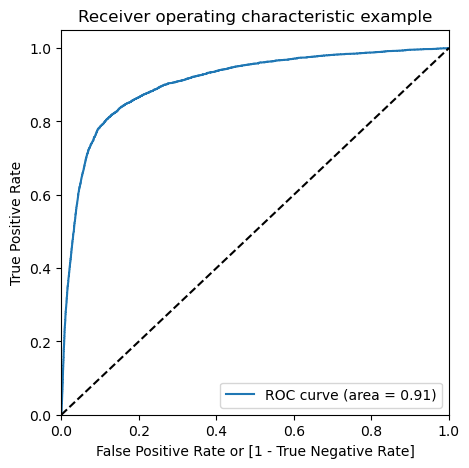

In [555]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [556]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.017597,61787,0,1,0,0,0,0,0,0,0,0,0
1,0,0.003851,19961,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000156,11040,0,1,0,0,0,0,0,0,0,0,0
3,0,0.331935,27673,0,1,1,1,1,0,0,0,0,0,0
4,0,0.004323,22876,0,1,0,0,0,0,0,0,0,0,0


In [557]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.101574  1.000000  0.000000
0.1   0.1  0.817690  0.858750  0.813048
0.2   0.2  0.891324  0.780792  0.903821
0.3   0.3  0.914508  0.674101  0.941688
0.4   0.4  0.920937  0.526622  0.965517
0.5   0.5  0.919998  0.394615  0.979397
0.6   0.6  0.916998  0.281495  0.988846
0.7   0.7  0.907998  0.137030  0.995162
0.8   0.8  0.900916  0.036970  0.998592
0.9   0.9  0.898590  0.004018  0.999727


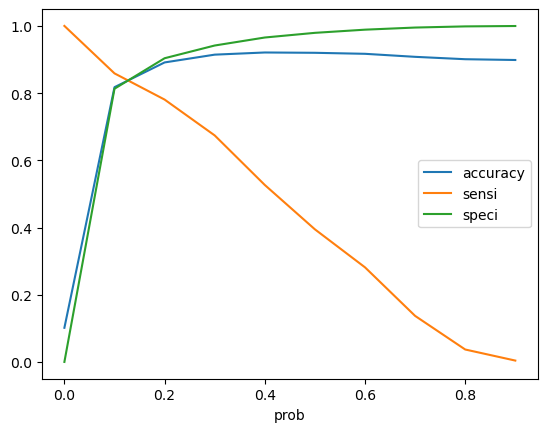

In [558]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [559]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.017597,61787,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.003851,19961,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000156,11040,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.331935,27673,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.004323,22876,0,1,0,0,0,0,0,0,0,0,0,0


In [560]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.9145084593563134

In [561]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[41455,  2567],
       [ 1622,  3355]], dtype=int64)

In [562]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [563]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6741008639742817

In [564]:
# Let us calculate specificity
TN / float(TN+FP)

0.9416882467856981

In [565]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05831175321430194


In [566]:
# Positive predictive value 
print (TP / float(TP+FP))

0.566531577169875


In [567]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9623464958098289


### Precision and Recall
#Looking at the confusion matrix again

In [568]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[43115,   907],
       [ 3013,  1964]], dtype=int64)

##### Precision
TP / TP + FP

In [569]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6840822013235807

##### Recall
TP / TP + FN

In [570]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.39461523005826804

In [571]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6840822013235807

In [572]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.39461523005826804

### Precision and recall tradeoff

In [573]:
from sklearn.metrics import precision_recall_curve

In [574]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 48994    1
 48995    0
 48996    0
 48997    0
 48998    0
 Name: Churn, Length: 48999, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 48994    1
 48995    0
 48996    0
 48997    0
 48998    0
 Name: predicted, Length: 48999, dtype: int64)

In [575]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

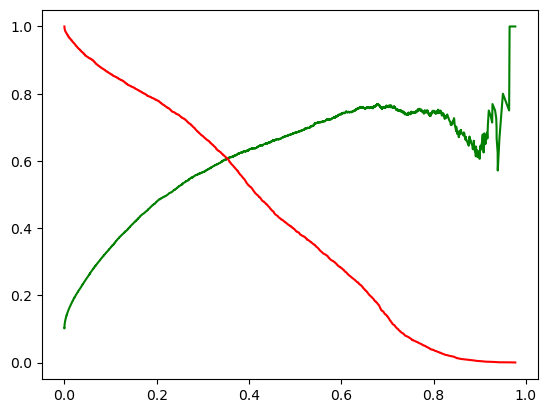

In [576]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [577]:
col


Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon'],
      dtype='object')

In [578]:
X_train.head()

,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_data_rech_8
61787,0.0,0.0,0.484290,0.934468,1.857679,-0.258765,-0.017714,-0.225532,2.536846,2.871208,...,-0.546606,-0.548432,-0.552115,-0.802041,-0.354908,-0.345378,-0.339169,0.141901,0.750531,0.442827
19961,0.0,0.0,-0.804046,-0.756739,-0.888937,-0.637007,-0.623989,-0.621073,-0.849388,-0.829841,...,1.829471,1.823380,1.811218,-0.687199,-0.354908,-0.345378,-0.339169,-0.522642,-0.515273,-0.590053
11040,0.0,0.0,0.454557,0.026941,-0.043543,-0.336707,-0.413835,0.110716,0.194906,0.686668,...,-0.546606,-0.548432,-0.552115,2.081046,-0.354908,-0.345378,-0.339169,0.151755,-0.425560,0.029928
27673,0.0,0.0,0.284828,-0.913120,-0.947430,1.682855,-0.354170,-0.553508,0.042278,-0.731865,...,-0.546606,-0.548432,-0.552115,-0.715636,-0.354908,-0.345378,-0.339169,0.120991,-0.677492,-0.681696
22876,0.0,0.0,-0.900542,-0.854786,-0.798718,-0.582882,-0.432222,-0.403475,-0.598811,-0.655245,...,-0.546606,-0.548432,-0.552115,-0.745167,-0.354908,-0.345378,-0.339169,-0.734623,-0.729107,-0.577902


## 5. Test Model on test dataset [Test dataset generated from Train CSV files]

In [579]:
coltemp
X_test[coltemp] = scaler.transform(X_test[coltemp])
X_test = X_test[col]
X_test.head()

,arpu_6,offnet_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,std_og_t2t_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2f_mou_8,...,total_rech_amt_7,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,aon
57621,2.513361,-0.528271,-0.320137,1.917908,-0.399405,-0.033232,2.370425,-0.755301,-0.533489,-0.369393,...,2.523402,0.360929,-0.348710,0.606490,-0.388182,-0.500820,-0.360106,-0.362171,-0.316881,-0.586575
39559,1.121407,1.346328,-0.320137,1.157257,0.007602,-0.296344,-0.515195,-0.241786,3.228466,2.184428,...,0.699543,0.825325,0.745421,0.748943,-0.836430,2.729766,-0.257935,3.453601,-0.316660,-0.810791
41415,1.700521,0.978622,-0.320137,-0.395273,-0.660746,3.373757,-0.388548,-0.769610,-0.533489,-0.369393,...,1.312266,-0.595182,-0.609217,0.891396,-0.388182,-0.500820,-0.360106,-0.362171,-0.316881,-0.875321
47731,-0.078379,-0.705378,-0.320137,-0.636852,-0.629150,0.238550,0.323308,-0.255095,-0.413623,-0.369393,...,-0.360798,-0.868356,-0.869725,0.891396,-0.537598,-0.500820,-0.360106,-0.362171,-0.316881,0.037948
64801,2.513361,2.309178,-0.320137,2.915007,1.023191,3.373757,1.187944,1.045302,0.150244,-0.369393,...,2.468000,2.136563,1.995857,0.891396,-0.836430,2.789814,-0.033898,3.453601,3.011593,0.367163


In [580]:
X_test_sm = sm.add_constant(X_test)

In [581]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [582]:
y_test_pred[:10]

57621    0.051375
39559    0.001322
41415    0.105028
47731    0.049116
64801    0.000224
11615    0.055309
24656    0.003979
22411    0.022064
936      0.000282
32268    0.009477
dtype: float64

In [583]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [584]:
# Let's see the head
y_pred_1.head()

,0
57621,0.051375
39559,0.001322
41415,0.105028
47731,0.049116
64801,0.000224


In [585]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [586]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [587]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [588]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [589]:
y_pred_final.head()

,churn_probability,CustID,0
0,0,57621,0.051375
1,0,39559,0.001322
2,0,41415,0.105028
3,0,47731,0.049116
4,0,64801,0.000224


In [590]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [591]:
y_pred_final.head()

,churn_probability,CustID,Churn_Prob
0,0,57621,0.051375
1,0,39559,0.001322
2,0,41415,0.105028
3,0,47731,0.049116
4,0,64801,0.000224


In [592]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','churn_probability','Churn_Prob'], axis=1)

In [593]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [594]:
y_pred_final.head(10)

,churn_probability,CustID,Churn_Prob,final_predicted
0,0,57621,0.051375,0
1,0,39559,0.001322,0
2,0,41415,0.105028,0
3,0,47731,0.049116,0
4,0,64801,0.000224,0
5,0,11615,0.055309,0
6,0,24656,0.003979,0
7,0,22411,0.022064,0
8,0,936,0.000282,0
9,0,32268,0.009477,0


In [595]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.final_predicted)

0.9200952380952381

In [596]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.final_predicted )
confusion2

array([[18243,   602],
       [ 1076,  1079]], dtype=int64)

In [597]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [598]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5006960556844547

In [599]:
# Let us calculate specificity
TN / float(TN+FP)

0.9680551870522685

In [600]:
col

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon'],
      dtype='object')

## 6. Run on the test file and create sample submission file


In [601]:
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
output = unseen[['id']]
output["final_predicted"] = 0


In [602]:
unseen.fillna(0, inplace=True)

In [603]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [604]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,0.0,0.0,0.0,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,0.0,0.0,0.0,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,0.0,0.0,0.0,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,0.0,0.0,0.0,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,0.0,0.0,0.0,462,0.00,0.00,0.00


In [605]:
unseen['total_data_rech_6'] = unseen.total_rech_num_6 * unseen.total_rech_amt_6
unseen['total_data_rech_7'] = unseen.total_rech_num_7 * unseen.total_rech_amt_7
unseen['total_data_rech_8'] = unseen.total_rech_num_8 * unseen.total_rech_amt_8

In [606]:
dataset_date_col  = [column for column in unseen.columns if 'date' in column]
dataset_date_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [607]:
for i in unseen[dataset_date_col]:
    unseen[i] = pd.to_datetime(unseen[i])

In [608]:
for i in unseen[dataset_date_col]:
    unseen[i] = unseen[i].values.astype(np.int64) // 10 ** 9

In [609]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_data_rech_8
0,69999,109,0.0,0.0,0.0,1404086400,1406764800,1409443200,91.882,65.330,...,0.0,0.0,0.0,1692,0.00,0.00,0.00,515,450,240
1,70000,109,0.0,0.0,0.0,1404086400,1406764800,1409443200,414.168,515.568,...,0.0,0.0,0.0,2533,0.00,0.00,0.00,2500,2000,2500
2,70001,109,0.0,0.0,0.0,1404086400,1406764800,1409443200,329.844,434.884,...,0.0,0.0,0.0,277,525.61,758.41,241.84,3000,9000,5000
3,70002,109,0.0,0.0,0.0,1404086400,1406764800,1409443200,43.550,171.390,...,0.0,0.0,0.0,1244,0.00,0.00,0.00,330,1300,0
4,70003,109,0.0,0.0,0.0,1404086400,1406764800,1409443200,306.854,406.289,...,0.0,0.0,0.0,462,0.00,0.00,0.00,3916,3430,4368


In [610]:
coltemp
unseen[coltemp] = scaler.transform(unseen[coltemp])
unseen = unseen[col]
unseen.head()

,arpu_6,offnet_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,std_og_t2t_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2f_mou_8,...,total_rech_amt_7,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,aon
0,-0.759517,-0.645248,-0.320137,-0.199646,-0.705517,-0.424425,-0.246266,-0.799928,-0.533489,-0.369393,...,-0.764388,-0.868356,-0.869725,-0.105775,-0.836430,-0.50082,-0.360106,-0.362171,-0.316881,0.532317
1,0.665621,1.202314,-0.320137,-0.226860,3.245662,-0.441191,-0.678920,0.953946,-0.533489,-0.369393,...,0.739902,2.136563,1.995857,-0.105775,-0.836430,-0.50082,-0.360106,-0.362171,-0.316881,1.452148
2,0.292744,-0.592865,5.459104,-0.669420,-0.795058,-0.441191,-0.737217,-0.895287,-0.533489,-0.369393,...,2.574401,5.551244,5.252199,0.464037,-0.836430,-0.50082,-0.360106,-0.362171,-0.316881,-1.015319
3,-0.973239,-0.700760,-0.320137,-0.669420,-0.575382,-0.441191,-0.222590,4.177219,-0.417170,-0.369393,...,-0.140658,0.770691,-1.260486,-0.105775,-0.836430,-0.50082,-0.360106,-0.362171,-0.316881,0.042323
4,0.191082,-0.443463,-0.320137,-0.344638,-0.677883,5.170371,-0.515865,-0.818340,-0.533489,0.468010,...,0.703212,0.497516,0.432812,0.748943,1.105977,-0.50082,-0.360106,-0.362171,-0.316881,-0.812978


In [612]:
unseen.shape 

(30000, 24)

In [613]:
#unseen.index = np.arange(69999, len(unseen) + 69999)
#unseen.head()

In [614]:
#unseen["CustID"]=unseen.index

In [615]:
#unseen.head()

In [616]:
X_test_sm2 = sm.add_constant(unseen)
#Making predictions on the test set
y_test_pred2 = res.predict(X_test_sm2)
y_test_pred2.index = np.arange(69999, len(y_test_pred2) + 69999)

In [617]:
y_test_pred2[:10]

69999    0.008475
70000    0.006643
70001    0.486461
70002    0.001259
70003    0.011266
70004    1.000000
70005    0.247943
70006    0.028891
70007    0.096133
70008    0.314921
dtype: float64

In [618]:
# Converting y_pred to a dataframe which is an array
y_pred_2 = pd.DataFrame(y_test_pred2)

In [619]:
# Let's see the head
y_pred_2.head()

,0
69999,0.008475
70000,0.006643
70001,0.486461
70002,0.001259
70003,0.011266


In [620]:
y_pred_final2 = pd.concat([ y_pred_2],axis=1)
y_pred_final2.head()

y_pred_final2= y_pred_final2.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final2.head()

y_pred_final2['final_prediction'] = y_pred_2[0].map(lambda x: 1 if x > 0.42 else 0)

#y_pred_final2["CustID"]=y_pred_final2.index
y_pred_final2.head(10)


,Churn_Prob,final_prediction
69999,0.008475,0
70000,0.006643,0
70001,0.486461,1
70002,0.001259,0
70003,0.011266,0
70004,1.000000,1
70005,0.247943,0
70006,0.028891,0
70007,0.096133,0
70008,0.314921,0


In [621]:
output = y_pred_final2[[ 'final_prediction']]
output.head(10)

,final_prediction
69999,0
70000,0
70001,1
70002,0
70003,0
70004,1
70005,0
70006,0
70007,0
70008,0


In [627]:
#Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.
output.to_csv('Submission.csv',index=True)

In [628]:
#check the churn probability 
churn1 = (sum(y_pred_final2['final_prediction'])/len(y_pred_final2['final_prediction'].index))*100
print("churn customers in test CSV ",sum(y_pred_final2['final_prediction']))
print("total customers in test CSV ",len(y_pred_final2['final_prediction']))
print("churn rate % ",churn1)


churn customers in test CSV  3248
total customers in test CSV  30000
churn rate %  10.826666666666666


#### IMP columns which needs to taken care by company in order to predict churn customers,
1. Company needs to focus on the plan related to STD call rates 
2. Company needs to focus on the plan related to Roaming call rates  
3. Check the previous month recharge amount, volums, last day recharge and call details to predict churn customers 

In [631]:
col

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_7', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon'],
      dtype='object')